# **Bank marketing campaigns**

## Disusun Oleh: 
###             1. CHRISTIAN TJOPUTERA
###             2. Ahmad Zaid Makarim
###             3. Ronny Sahat Martua Purba

## **Business Problem Understanding**

### **Context**
Sebuah bank di Portugal menjalankan kampanye pemasaran melalui **telemarketing** untuk menawarkan **produk deposito berjangka (*term deposit*)**. Dalam kampanye ini, nasabah dihubungi satu per satu melalui panggilan telepon untuk menerima penawaran produk.

Namun, salah satu tantangan utama adalah **tingginya biaya operasional** akibat durasi panggilan yang panjang, terutama ketika dilakukan dalam skala besar. Meskipun panggilan telemarketing penting untuk menjangkau semua nasabah, **tidak semua interaksi berujung pada pembukaan deposito**, sehingga waktu dan biaya bisa terbuang sia-sia.

Selama kampanye berlangsung, berbagai data dikumpulkan, seperti:

1. Profil nasabah (umur, pekerjaan, status kredit, dll.)

2. Riwayat kampanye sebelumnya

3. Durasi panggilan (`duration`)

4. Biaya estimasi panggilan (`call_fee`)

Variabel `duration` terbukti memiliki **korelasi kuat dengan hasil kampanye (`y`)**, dan dapat digunakan untuk menyusun **strategi efisiensi durasi**, tanpa harus mengorbankan cakupan nasabah.

Perusahaan ingin mengetahui bagaimana durasi percakapan dapat dimanfaatkan secara **efisien** agar:

1. Tidak membuang biaya untuk nasabah yang tidak tertarik,

2. Tapi tetap mengoptimalkan konversi pada nasabah yang potensial membuka deposito.

Target
* `y = "no"`: Nasabah **tidak membuka** deposito
* `y = "yes"`: Nasabah **membuka deposito**

### **Problem Statement**
Bank tetap ingin **menghubungi seluruh nasabah,** namun menghadapi risiko:

1. **Durasi panggilan yang terlalu panjang** pada nasabah yang tidak tertarik

2. **Pemborosan biaya komunikasi** dan beban waktu bagi agen telemarketing

Oleh karena itu, perlu diterapkan strategi **cut-off durasi** (`duration_cut_off`) yang optimal, yaitu batas waktu maksimal percakapan berdasarkan hasil historis dan potensi konversi nasabah.

#### **Berdasarkan hasil analisis data:**

1. **Total biaya aktual (tanpa cut-off):** €45.359,00

2. **Total biaya setelah cut-off:** €24.857,60

3. **Penghematan biaya: €20.501,40 (45%)**

#### **Selain itu, dari sisi waktu:**

1. **Total durasi aktual panggilan:** 10.638.243 detik (**177.304 menit**)

2. **Total durasi setelah cut-off:** 5.991.325 detik (**99.855 menit**)

3. **Penghematan waktu: 4.646.918 detik** (**77.448 menit) (43,68%)**

Sama dengan **1.290 jam telepon**, atau hampir **161 hari kerja agen** (8 jam per hari)

### **Goals**
Proyek ini bertujuan untuk:

1. **Meningkatkan efisiensi kampanye telemarketing** tanpa mengorbankan jangkauan nasabah

2. **Menetapkan batas durasi optimal** (`duration_cut_off`) berdasarkan data historis

3. **Menghemat biaya dan waktu** melalui strategi cut-off, khususnya pada nasabah yang tidak tertarik

4. Membangun **model prediktif** untuk membantu mengenali nasabah yang potensial membuka deposito (`y = "yes"`)

### **Analytic Approach**
Pendekatan yang dilakukan meliputi:

1. **Analisis eksploratif** terhadap variabel-variabel yang berkorelasi dengan konversi (`y`)

2. Penambahan fitur biaya (`call_fee`) dan `duration_cut_off` sebagai strategi efisiensi

3. Penerapan **model machine learning** untuk memprediksi apakah nasabah akan membuka deposito

4. Evaluasi strategi cut-off dalam menurunkan biaya dan durasi panggilan

### **Metric Evaluation**

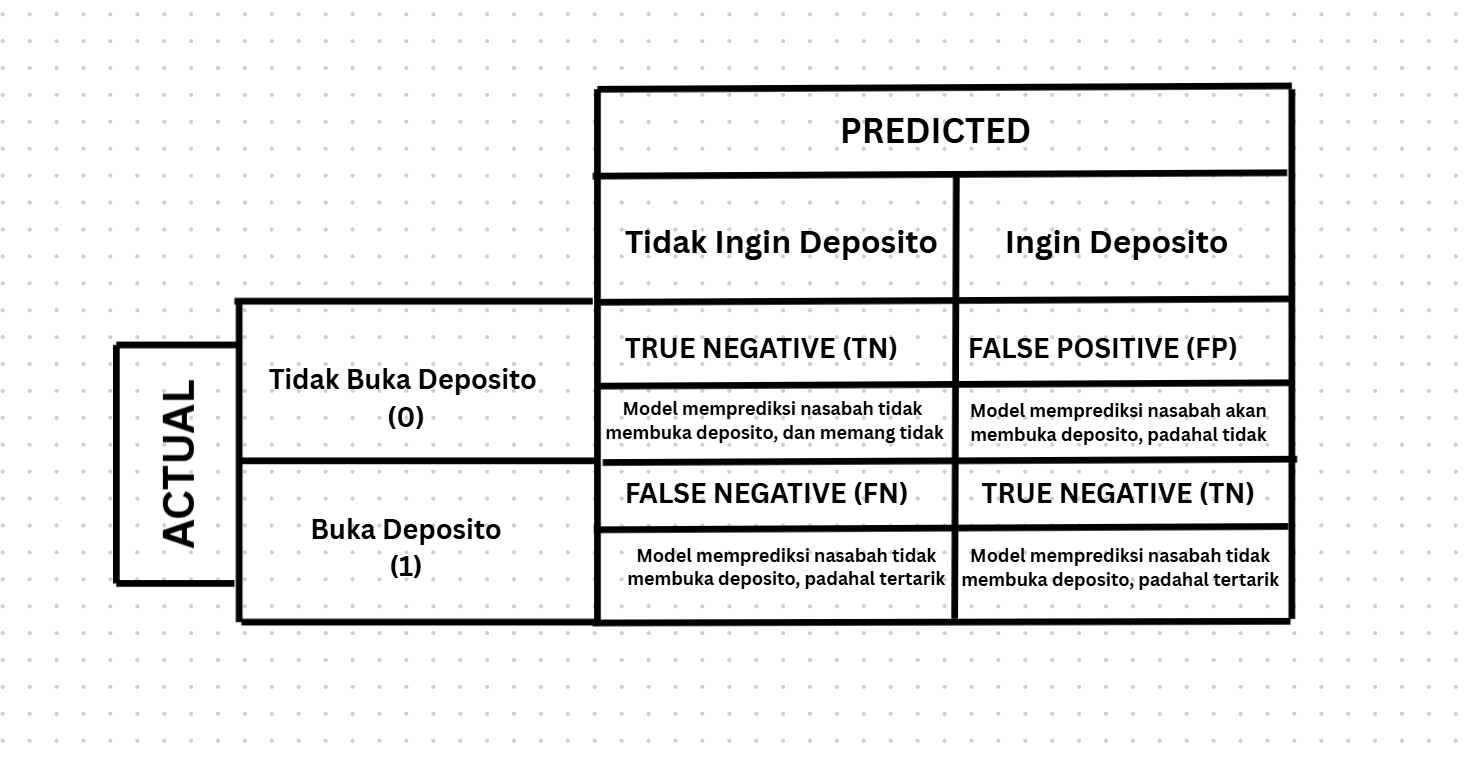

|                                     | **PREDICTED: Tidak buka deposito (0)**                                                               | **PREDICTED: Buka deposito (1)**                                                              |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **ACTUAL: Tidak buka deposito (0)** | **True Negative (TN)**<br>Model memprediksi nasabah tidak membuka deposito, dan memang tidak membuka | **False Positive (FP)**<br>Model memprediksi nasabah akan membuka deposito, padahal tidak     |
| **ACTUAL: Buka deposito (1)**       | **False Negative (FN)**<br>Model memprediksi nasabah tidak membuka deposito, padahal tertarik        | **True Positive (TP)**<br>Model memprediksi nasabah akan membuka deposito, dan memang membuka |


#### **Error Analysis**
Type 1 Error (False Positive)

❗ Model bilang nasabah akan tertarik, tapi ternyata tidak.

💸 Konsekuensi: Biaya telepon terbuang sia-sia, waktu agent habis, pulsa & tenaga terbuang.

Type 2 Error (False Negative)

❗ Model bilang nasabah tidak tertarik, padahal sebenarnya tertarik.

📉 Konsekuensi: Kehilangan nasabah potensial yang seharusnya bisa buka deposito → rugi peluang bisnis.

#### **Trade-off & Strategi**

Berdasarkan konsekuensinya:

1. Kita **tidak ingin terlalu banyak False Positives** → buang biaya

2. Tapi juga **tidak boleh terlalu banyak False Negatives** → kehilangan target prospek

Artinya, model perlu seimbang:

1. **Precision tinggi** → agar prediksi `ya` benar-benar akurat

2. **Recall tinggi** → agar tidak melewatkan nasabah potensial

#### **Metrik Evaluasi Utama**

Karena target `y` bersifat biner (`"yes"` / `"no"`), model akan dievaluasi menggunakan:

1. **Precision**: Untuk menghindari menyasar nasabah yang tidak tertarik (biaya sia-sia)

2. **Recall**: Untuk tidak melewatkan nasabah potensial

3. **F1-score**: Keseimbangan antara precision dan recall

4. **PR Curve & ROC AUC**: Khususnya karena data bersifat **imbalanced**

#### **Risiko yang harus dihindari:**

1. **False Positive** → Biaya percakapan terbuang (salah prediksi ya)

2. **False Negative** → Peluang konversi hilang (salah prediksi tidak)

#### **Kesimpulan**
Untuk kampanye telemarketing deposito:

Kita butuh model klasifikasi yang dapat **mengenali nasabah potensial** membuka deposito, **sambil menekan jumlah telepon yang sia-sia**.

## **Data Understanding**

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML
from tabulate import tabulate

In [41]:
file_path = "../data/revision/bank-additional-call-fee.csv"
df = pd.read_csv(file_path, sep=';') 

### **Attribute Information**

In [42]:
# 1. Ambil tipe data asli dari DataFrame
df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Attribute', 'Data Type']

# 2. Buat deskripsi tambahan manual (dari informasi yang Anda berikan)
deskripsi_manual = [
    ["age", "Numerik", "Usia klien"],
    ["job", "Kategorikal", "Jenis Pekerjaan Klien"],
    ["marital", "Kategorikal", "Status Pernikahan Klien"],
    ["education", "Kategorikal", "Tingkat pendidikan klien"],
    ["default", "Kategorikal", "Status kredit klien"],
    ["housing", "Kategorikal", "Status apakah klien memiliki pinjamanan perumahan"],
    ["loan", "Kategorikal", "Status apakah klien memiliki pinjaman pribadi"],
    ["contact", "Kategorikal", "Jenis komunikasi kontak terakhir"],
    ["month", "Kategorikal", "Bulan kontak terakhir dengan klien dalam tahun ini"],
    ["day_of_week", "Kategorikal", "Hari dalam seminggu kontak terakhir dengan klien"],
    ["duration", "Numerikal", "Durasi kontak terakhir dengan klien dalam detik"],
    ["campaign", "Numerikal", "Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini"],
    ["pdays", "Numerikal", "Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya"],
    ["previous", "Numerikal", "Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini"],
    ["poutcome", "Kategorikal", "Hasil dari kampanye pemasaran sebelumnya"],
    ["emp.var.rate", "Numerikal", "Tingkat variasi pekerjaan"],
    ["cons.price.idx", "Numerikal", "Indeks harga konsumen"],
    ["cons.conf.idx", "Numerikal", "Indeks kepercayaan konsumen"],
    ["euribor3m", "Numerikal", "Tingkat euribor 3 bulan"],
    ["nr.employed", "Numerikal", "Jumlah karyawan"],
    ["y", "Kategorikal", "Status apakah klien telah berlangganan deposito berjangka?"],
    ["call_fee", "Numerikal", "Biaya Penggunaan Telepon"],
    ["duration_cut_off", "Numerikal", "Durasi kontak \"cut off\" dengan klien dalam detik"],
    ["call_fee_cut_off", "Numerikal", "Biaya Penggunaan \"cut off\" Telepon"]
]

df_deskripsi = pd.DataFrame(deskripsi_manual, columns=["Attribute", "Jenis Data", "Deskripsi"])

# 3. Gabungkan kedua DataFrame berdasarkan kolom 'Attribute'
df_info_akhir = pd.merge(df_dtypes, df_deskripsi, on="Attribute", how="left")


# 4. Tampilkan hasil
# Buat HTML dari DataFrame tanpa index
html_table = df_info_akhir.to_html(index=False)

# Tambahkan atribut style langsung ke tag <th> dan <td>
html_table = html_table.replace(
    "<th>", '<th style="text-align: center; padding: 8px; background-color: #f2f2f2;">'
).replace(
    "<td>", '<td style="text-align: left; padding: 6px;">'
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))

Attribute,Data Type,Jenis Data,Deskripsi
age,int64,Numerik,Usia klien
job,object,Kategorikal,Jenis Pekerjaan Klien
marital,object,Kategorikal,Status Pernikahan Klien
education,object,Kategorikal,Tingkat pendidikan klien
default,object,Kategorikal,Status kredit klien
housing,object,Kategorikal,Status apakah klien memiliki pinjamanan perumahan
loan,object,Kategorikal,Status apakah klien memiliki pinjaman pribadi
contact,object,Kategorikal,Jenis komunikasi kontak terakhir
month,object,Kategorikal,Bulan kontak terakhir dengan klien dalam tahun ini
day_of_week,object,Kategorikal,Hari dalam seminggu kontak terakhir dengan klien


### **Dimesi Data**

In [50]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [51]:
baris, kolom = df.shape
display(Markdown(f"**Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Dataset ini mempunyai:**
- Jumlah data/baris: `41188`
- Jumlah atribut/kolom: `25`

### **Cuplikan Data**

In [45]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.7,170,0.3
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.1,60,0.1


## **Pre Processing**

### **Remove Unused Data**

Kita akan melakukan penghapusan kolom `duration` beserta turunannya seperti `call_off`, `duration_cut_off`, dan `call_fee_cut_off`, karena kolom ini dapat menyebabkan data leakage jika digunakan sebagai fitur untuk model ML. hal ini dapat dilihat dibawah ini

In [52]:
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
correlation = df['duration'].corr(df['y_numeric'])
print(f"Korelasi antara duration dan y: {correlation:.3f}")
duration_yes = df[df['y'] == 'yes']['duration'].describe()
duration_no = df[df['y'] == 'no']['duration'].describe()
print("\nStatistik duration untuk y = yes:\n", duration_yes)
print("\nStatistik duration untuk y = no:\n", duration_no)

Korelasi antara duration dan y: 0.405

Statistik duration untuk y = yes:
 count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

Statistik duration untuk y = no:
 count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64


### **Data Duplikasi**

#### **Pemeriksaan Data Duplikasi**

In [53]:
duplicate_rows_size = df.duplicated(keep=False).sum()
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_size}** data duplikat."))

Dataset ini mempunyai **28** data duplikat.

In [54]:
# Ambil baris-baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Tampilkan seluruh baris duplikat dalam bentuk tabel
display(duplicate_rows) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
236,56,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2,0
5664,56,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3,0


#### **Penghapusan Data Duplikasi**

In [55]:
output_path = "../data/revision/bank-additional-full-no-duplicates.csv"

In [56]:
# Remove duplicate rows and keep only the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Save the cleaned DataFrame to a new CSV file
df_no_duplicates.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-no-duplicates.csv**

#### **Pembacaan Ulang DataFrame**

In [57]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5,1
41170,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9,0
41171,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9,0
41172,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5,1


In [58]:
baris, kolom = df.shape
display(Markdown(f"**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**
- Jumlah data/baris: `41174`
- Jumlah atribut/kolom: `25`

### **Perubahan Atribut** 

In [59]:
output_path = "../data/revision/bank-additional-full-perubahan-atribut.csv"

Untuk mempermudah analisis numerik dan pemodelan prediktif, dilakukan konversi nilai kategorikal pada atribut `month` dan `day_of_week` menjadi representasi numerik.

* **Atribut `month` yang semula berupa nama bulan (`"jan"`, `"feb"`, ..., `"dec"`) diubah menjadi angka 1–12**.

* **Atribut `day_of_week` yang semula berupa nama hari (`"mon"`, `"tue"`, ..., `"fri"`) diubah menjadi angka 1–5**.

#### **Perubahan data `month`**

In [60]:
print(df['day_of_week'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']


In [61]:
# Map nama bulan ke angka
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
Markdown("Perubahan data `month` selesai dilakukan")

Perubahan data `month` selesai dilakukan

#### **Perubahan data `day_of_week`**

In [62]:
# Map nama hari ke angka (opsi: Senin = 1 atau Minggu = 0)
# Pastikan nilai huruf kecil dan tanpa spasi
df['day_of_week'] = df['day_of_week'].astype(str).str.strip().str.lower()

# Lakukan mapping
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)
Markdown("Perubahan data `day_of_week` selesai dilakukan")

Perubahan data `day_of_week` selesai dilakukan

In [63]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3,0
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5,1
41170,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9,0
41171,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9,0
41172,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5,1


#### **Penyimpanan Data Perubahan**

In [64]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-perubahan-atribut.csv**

#### **Pembacaan Ulang DataFrame**

In [65]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3,0
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5,1
41170,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9,0
41171,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9,0
41172,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5,1


### **Perbaikan Missing Value**

In [66]:
output_path = "../data/revision/bank-additional-full-missing-value.csv"

Pada dataset ini, nilai hilang tidak ditandai dengan `NaN` secara eksplisit, melainkan dengan string `"unknown"`.
Oleh karena itu, untuk mempermudah proses analisis visual menggunakan pustaka/*library* seperti `missingno` dan memanfaatkan fungsi imputasi standar dari pandas atau scikit-learn, seluruh nilai `"unknown"` akan digantikan dengan `np.nan`.

Langkah ini penting untuk memastikan bahwa semua teknik penanganan missing value dapat berjalan dengan baik dan akurat.

#### **Perubahan ke null value**

In [67]:
import numpy as np

# Ganti semua 'unknown' menjadi np.nan di seluruh DataFrame
df.replace('unknown', np.nan, inplace=True)

Markdown("Perubahan data `\"unknown\"` ke `null` selesai dilakukan")

Perubahan data `"unknown"` ke `null` selesai dilakukan

#### **Penyimpanan Data Perubahan**

In [68]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-missing-value.csv**

#### **Pembacaan Ulang DataFrame**

In [69]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off,y_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3,0
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5,1
41170,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9,0
41171,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9,0
41172,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5,1


#### **Pengecekan Nilai null**

In [70]:
output_path = "../data/revision/bank-additional-full-clean.csv"

In [71]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Misalnya df sudah didefinisikan sebelumnya
# df = pd.read_csv('data.csv')

listItem = []
for col in df.columns:
    try:
        unique_sample = list(df[col].dropna().drop_duplicates().sample(2).values)
    except ValueError:
        # Jika jumlah unique kurang dari 2
        unique_sample = list(df[col].dropna().drop_duplicates().values)
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df[col])) * 100, 2),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {dfDesc.to_html(index=False)}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))


dataFeatures,dataType,null,nullPct,unique,uniqueSample
age,int64,0,0.00,78,"[23, 86]"
job,object,330,0.80,11,"[self-employed, retired]"
marital,object,80,0.19,3,"[single, divorced]"
education,object,1730,4.20,7,"[basic.6y, university.degree]"
default,object,0,0.00,2,"[no, yes]"
housing,object,990,2.40,2,"[yes, no]"
loan,object,990,2.40,2,"[no, yes]"
contact,object,0,0.00,2,"[cellular, telephone]"
month,int64,0,0.00,10,"[5, 10]"
day_of_week,int64,0,0.00,5,"[4, 5]"


Berdasarkan hasil eksplorasi terhadap dataset, terdapat beberapa atribut yang memiliki **nilai kosong (null)** akibat proses konversi dari `"unknown"` ke `NaN`. Atribut-atribut dengan nilai null tersebut perlu ditangani agar tidak mengganggu proses pemodelan dan analisis lebih lanjut.

Berikut adalah daftar fitur dengan nilai null dan persentasenya:

1. `job` memiliki **330** nilai null (**0.80%**)

2. `marital` memiliki **80** nilai null (**0.19%**)

3. `education` memiliki **1,730** nilai null (**4.20%**)

4. `default` memiliki jumlah null tertinggi, yakni **8,596** nilai (**20.88%**)

5. `housing` memiliki **990** nilai null (**2.40%**)

6. `loan` memiliki **990** nilai null (**2.40%**)

Nilai null pada atribut-atribut ini umumnya berasal dari entri yang sebelumnya berisi `"unknown"`, dan kini ditandai sebagai `NaN` untuk mempermudah proses imputasi dan analisis dengan pustaka seperti `missingno`.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library `missingno`

reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [72]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#### **Bar Plot**

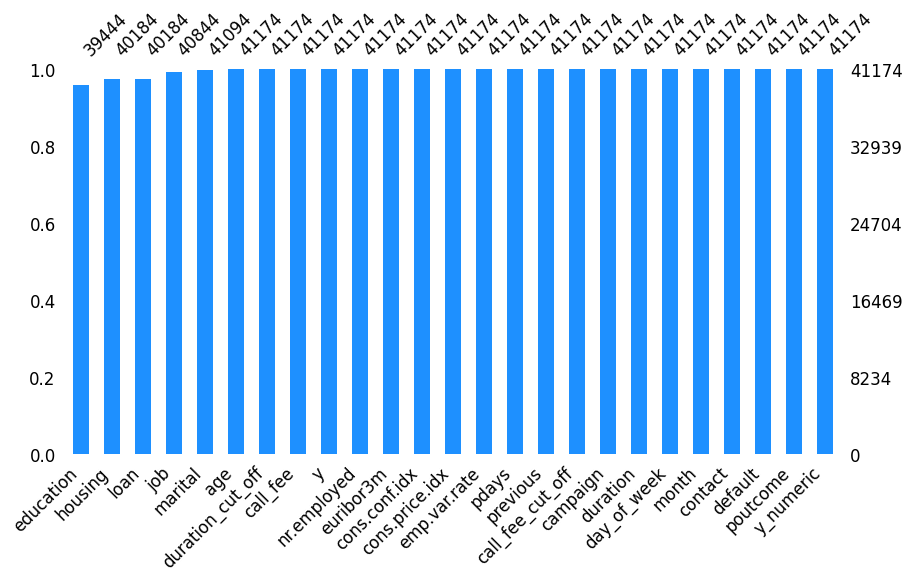

In [73]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

#### **Matriks Plot**

<Axes: >

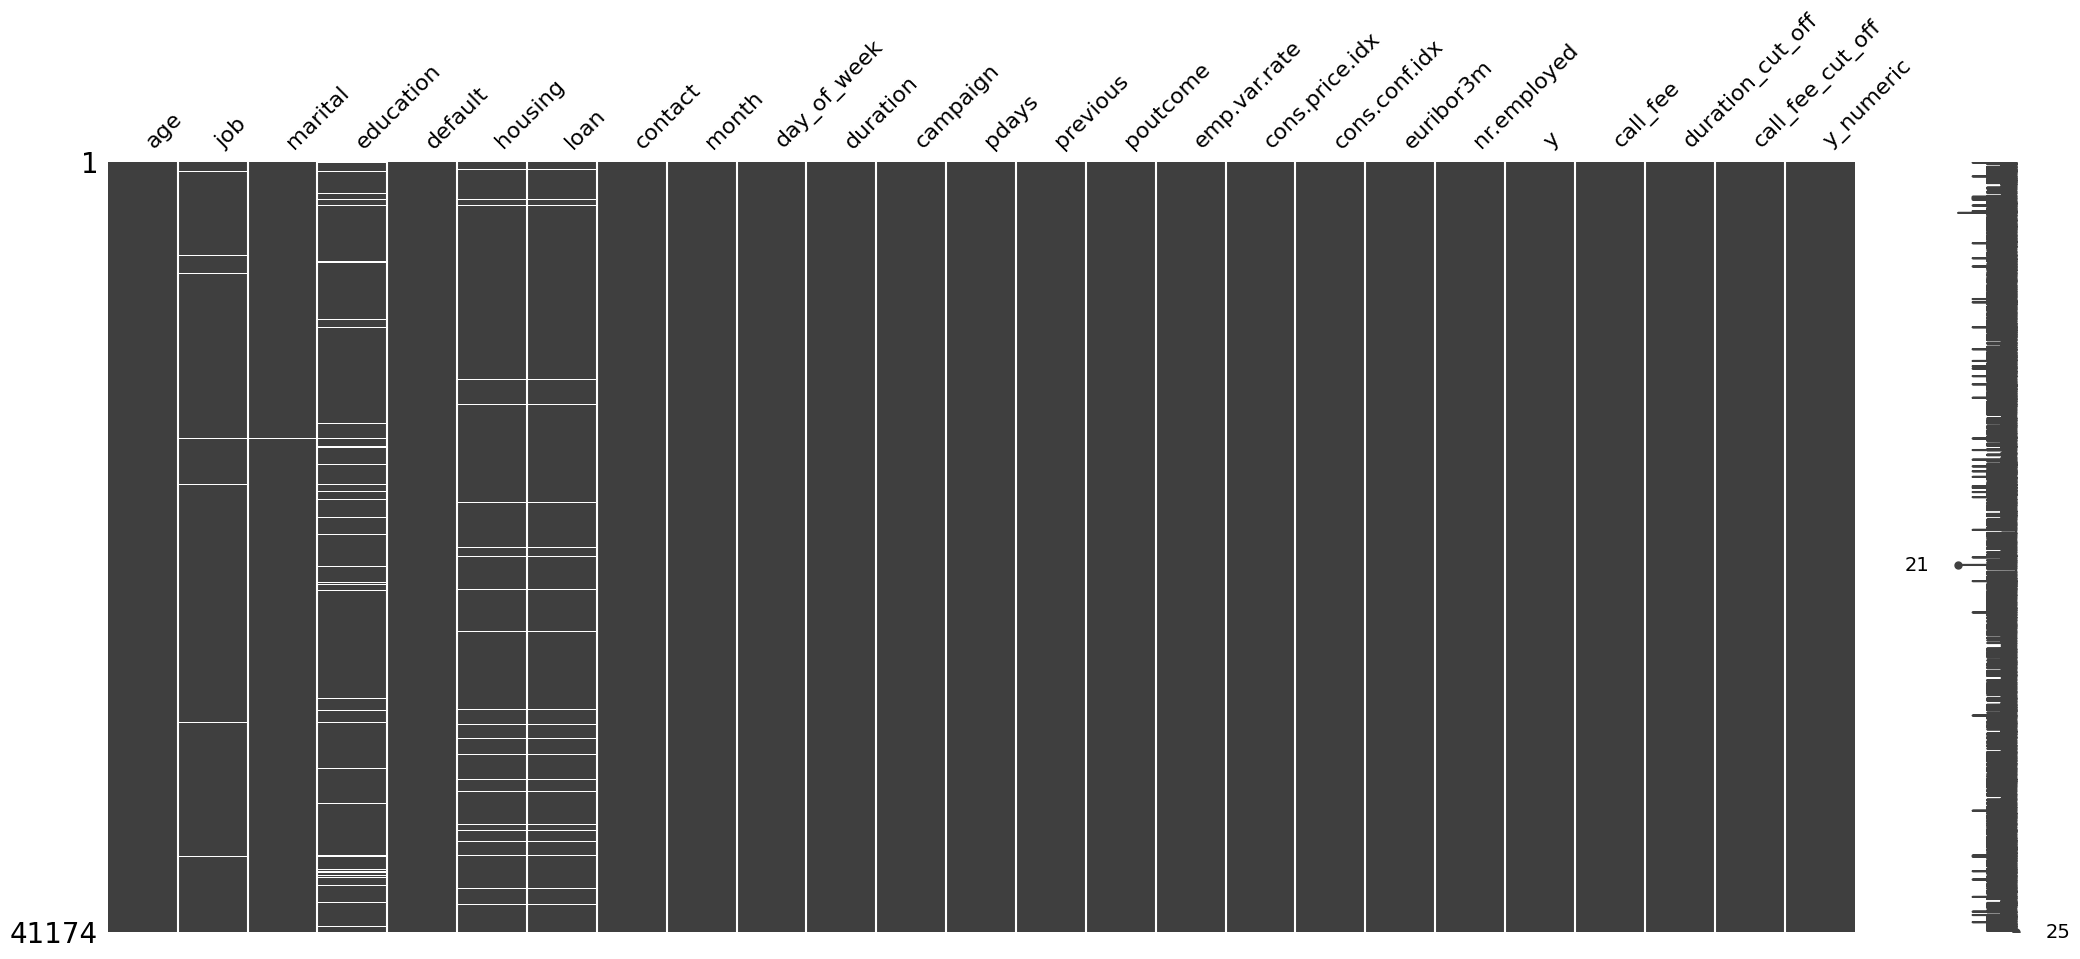

In [74]:
missingno.matrix(df)

#### **Heatmap**
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

* **-1** - **Korelasi Negatif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
* **0** - **Tidak ada korelasi** yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
* **1** - **Korelasi Positif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

<Axes: >

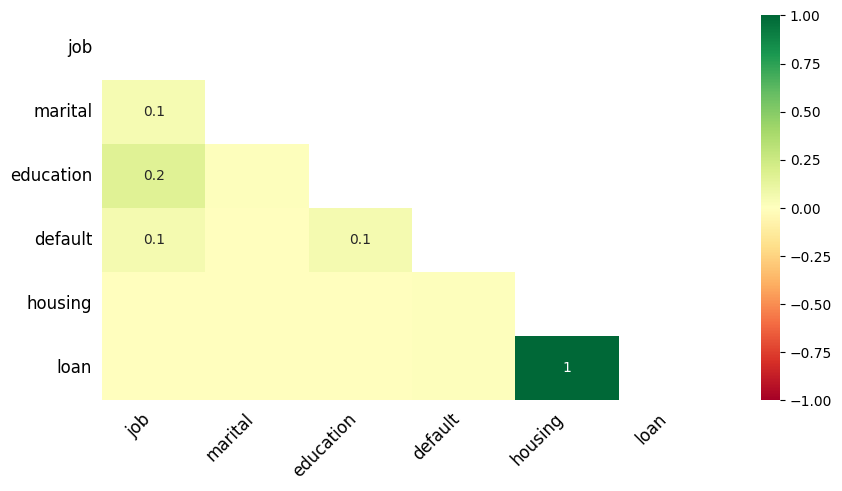

In [174]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Gambar heatmap di atas menggambarkan **korelasi antar kolom** yang memiliki nilai hilang (`null`) dalam dataset. Visualisasi ini membantu kita memahami apakah ada pola ketergantungan antar kolom yang kosong, yang bisa menjadi dasar strategi imputasi yang lebih tepat.

Beberapa insight penting dari heatmap tersebut:

1. Korelasi tertinggi muncul antara kolom `housing` dan `loan`, dengan nilai **1.0**, yang artinya **jika salah satu kolom missing, maka kolom lainnya juga pasti missing**. Ini menunjukkan hubungan yang sangat erat dan bisa dipertimbangkan untuk diimputasi secara bersamaan atau berdasarkan pola yang sama.

2. Korelasi rendah namun terdeteksi antara:

    1. `education` dan `job` sebesar **0.2**

    2. `education` dan `marital` sebesar **0.1**

    3. `default` dan `education` sebesar **0.1**

    Meskipun rendah, hal ini bisa menjadi pertimbangan tambahan ketika kita menyusun strategi imputasi berdasarkan relasi antar fitur.

3. Fitur seperti `job`, `marital`, dan `default` memiliki nilai korelasi yang sangat rendah antar satu sama lain, menunjukkan bahwa missing value di kolom tersebut terjadi secara **relatif independen**.

Secara keseluruhan, heatmap ini memberikan pemahaman bahwa **beberapa kolom memiliki keterkaitan dalam pola missing value-nya**, dan pendekatan imputasi berdasarkan korelasi ini akan lebih efektif dibandingkan imputasi global tanpa mempertimbangkan hubungan antar fitur.

#### **Dendogram**

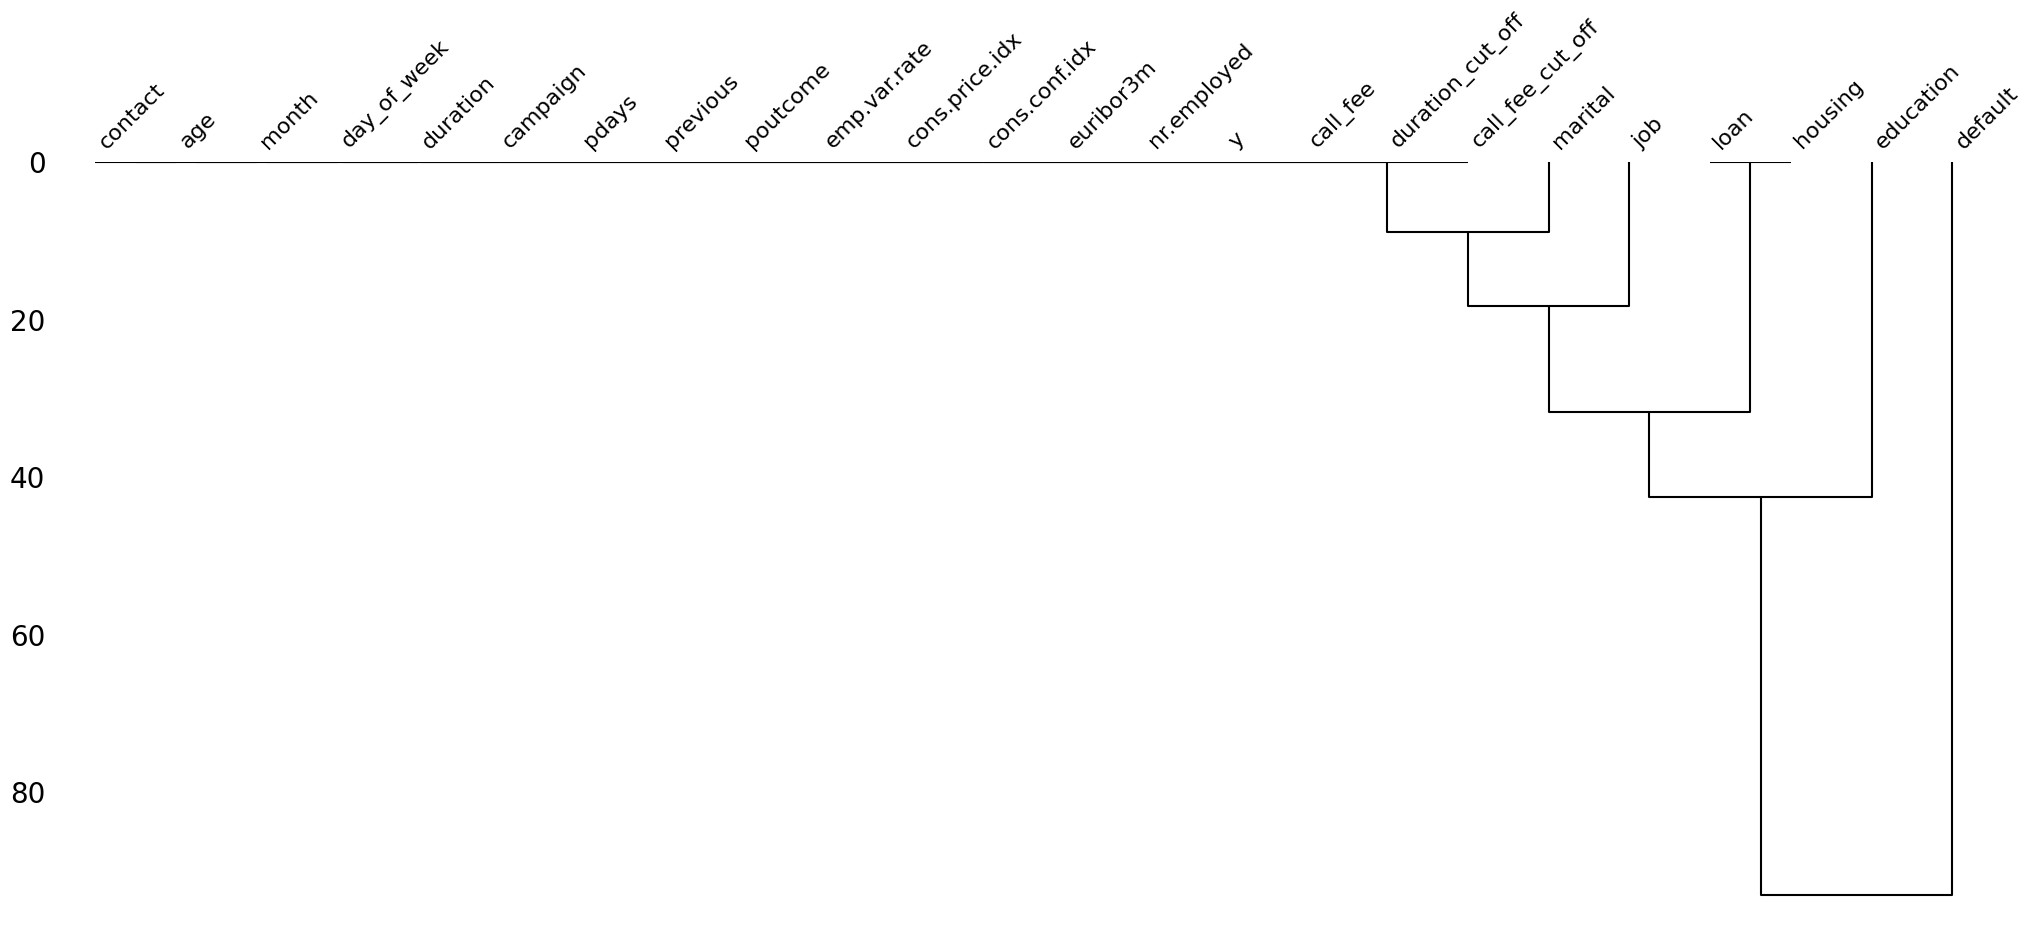

In [175]:
missingno.dendrogram(df)
plt.show()

Visualisasi dendogram di atas memberikan gambaran **struktur hierarki keterkaitan antar kolom** berdasarkan pola missing value yang ada dalam dataset. Dendogram ini berguna untuk mengelompokkan fitur-fitur yang cenderung memiliki pola missing yang **mirip atau terjadi bersamaan**.

Dari hasil dendogram dapat diperhatikan bahwa:

1. Kolom-kolom yang berada dalam **cabang yang sama atau berdekatan**, seperti `job`, `marital`, `loan`, `housing`, `education`, dan `default`, memiliki hubungan keterkaitan dalam hal keberadaan nilai `null`.

2. Kelompok tersebut menunjukkan bahwa **jika sebuah fitur memiliki missing value, fitur lain dalam grup tersebut juga cenderung memiliki missing value**.

3. Hal ini memberikan sinyal bahwa **strategi imputasi bisa dilakukan secara terarah** berdasarkan grup fitur tersebut, bukan secara individual.

Dengan mempertimbangkan hasil dendogram ini, kita akan melakukan **perbaikan nilai null secara bertahap**, dimulai dari fitur yang saling berkaitan secara hierarki, guna menjaga integritas dan konsistensi data.

#### **Pembersihan nilai `unknown` pada kolom `default`**

In [77]:
df.default.replace('unknown','no',inplace=True)

Kita isi kolom `default` yang memiliki nilai unknown dengan `no`, kita asumsikan bahwa orang yang memiliki nilai `unknown` memang tidak memiliki kredit macet, selain itu, hal ini juga merupakan alasan yang logis, sebab sebagian besar nasabah di bank memang tidak memiliki kredit macet

#### **Pembersihan nilai `unknown` pada kolom `job`**

In [76]:
#mengecek distribusi nasabah dengan job 'unknown' berdasarkan pekerjaannya
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
Series([], Name: count, dtype: int64)


In [78]:
basic_education_levels = ['basic.4y', 'basic.6y', 'basic.9y']
basic_education_df = df[df['education'].isin(basic_education_levels)]
basic_education_known_jobs_df = basic_education_df[basic_education_df['job'] != 'unknown']
job_distribution = basic_education_known_jobs_df.groupby('education')['job'].value_counts()
print(job_distribution)

education  job          
basic.4y   blue-collar      2317
           retired           597
           housemaid         474
           entrepreneur      137
           services          132
           unemployed        112
           management        100
           self-employed      93
           admin.             77
           technician         58
           student            26
basic.6y   blue-collar      1425
           services          226
           admin.            151
           technician         87
           management         85
           housemaid          77
           retired            75
           entrepreneur       71
           unemployed         34
           self-employed      25
           student            13
basic.9y   blue-collar      3623
           admin.            499
           services          388
           technician        384
           self-employed     220
           entrepreneur      210
           unemployed        186
           managem

Dari sini dapat kita ketahui bahwa seorang nasabah yang memiliki `education` = `"basic"` dari 4 year hingga 9 years, kebanyakan bekerja sebagai `blue-collar`. Dan dari sini dapat kita isi nasabah yang memiliki nilai `unknown` pada kolom jobnya, dan memiliki education `basic` 4 year hingga 9 year menjadi sebagai pekerja `blue-collar`

In [79]:
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'

In [80]:
df.loc[(df['job'] == 'unknown') & (df['education']=='high.school'), 'job'] = 'admin.'
df.loc[(df['job'] == 'unknown') & (df['education']=='university.degree'), 'job'] = 'admin.'

Kita lakukan pengisian untuk nasabah yang memiliki education `university.degree` dan `high.school` dengan job `admin`, karena lulusan tersebut sebagian besar bekerja sebagai `admin`. 

In [81]:
filtered_df = df[(df['age'] >= 60) & (df['job'] == 'unknown')]
count = len(filtered_df)
print(f"Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': {count}")

Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': 0


Disini kita cek nasabah yang memiliki umur 60 tahun atau lebih, tetapi kolom pekerjaannya bernilai `unknown`. Terdapat setidaknya 23 nasabah yang berumur 60 tahun atau lebih yang memiliki nilai `unknown` pada kolom `job`-nya.

In [82]:
age_60_df = df[df['age'] == 60]
age_60_known_jobs_df = age_60_df[age_60_df['job'] != 'unknown']
job_distribution = age_60_known_jobs_df['job'].value_counts()
print("Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:")
print(job_distribution)

Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:
job
retired          107
admin.            59
management        28
blue-collar       23
technician        15
housemaid         13
self-employed     12
entrepreneur       9
services           6
unemployed         3
Name: count, dtype: int64


Dari sini dapat kita lihat, bahwa seorang nasabah yang memiliki umur `60` tahun atau lebih telah pensiun atau `retired`, sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi `retired`.

In [83]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

In [84]:
education_level = 'professional.course'
job_status = 'unknown'
filtered_df = df[(df['education'] == education_level) & (df['job'] == job_status)]
count = len(filtered_df)
print(f"Jumlah nasabah dengan pendidikan '{education_level}' dan pekerjaan '{job_status}': {count}")

Jumlah nasabah dengan pendidikan 'professional.course' dan pekerjaan 'unknown': 0


Di sini kita cek nasabah yang memiliki education `professional.course`, tetapi kolom pekerjaannya bernilai `unknown`. Terdapat setidaknya 23 nasabah yang berumur 60 tahun atau lebih yang memiliki nilai `unknown` pada kolom `job`-nya.

In [85]:
education_level = 'professional.course'
prof_course_df = df[df['education'] == education_level]
prof_course_known_jobs_df = prof_course_df[prof_course_df['job'] != 'unknown']
job_distribution = prof_course_known_jobs_df['job'].value_counts()
print(f"Distribusi pekerjaan untuk nasabah dengan pendidikan '{education_level}':")
print(job_distribution)

Distribusi pekerjaan untuk nasabah dengan pendidikan 'professional.course':
job
technician       3317
blue-collar       453
admin.            363
retired           241
services          218
self-employed     168
unemployed        142
entrepreneur      135
management         89
housemaid          59
student            43
Name: count, dtype: int64


Dari sini dapat kita lihat, bahwa seorang nasabah yang memiliki `education` = `professional.course` sebagian besar memiliki pekerjaan sebagai `technician`, sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi `technician`.

In [86]:
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

Sekarang hanya tersisa nasabah yang memiliki job `unknown` akan tetapi educationnya juga berisikan `unknown`. Hal ini cukup sulit untuk diisi, karena tidak adanya korelasi terhadap variabel lain, selain itu, data tersebut hanya berisikan sekitaran 117 nasabah saja, akan lebih baik untuk didrop saja.

In [87]:
# mendrop nasabah yang memiliki job 'unknown' beserta education 'unknown'
indeks_yang_dihapus = df[(df['job'] == 'unknown') & (df['education'] == 'unknown')].index
df.drop(indeks_yang_dihapus, inplace=True)

In [88]:
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
Series([], Name: count, dtype: int64)


 #### **Pembersihan nilai `"unknown"` pada kolom `education`**

In [90]:
unknown_education_df = df[df['education'] == 'unknown']
remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")
print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)

Jumlah sisa nasabah dengan pendidikan 'unknown': 0

Distribusi berdasarkan 'Job' (Pekerjaan):
Series([], Name: count, dtype: int64)


Di sini kita lakukan distribusi nasabah yang memiliki education `unknown` berdasarkan pekerjannya

In [91]:
# Saring data untuk mengecualikan nilai 'unknown'
known_data_df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]
distribution_pivot = known_data_df.groupby('education')['job'].value_counts().unstack(fill_value=0)
education_totals = distribution_pivot.sum(axis=1)
sorted_distribution = distribution_pivot.loc[education_totals.sort_values(ascending=False).index]
print("Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):")
print(sorted_distribution)

Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):
job                  admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                                       
university.degree      5749           94           610        139        2063   
high.school            3329          878           234        174         298   
basic.9y                499         3623           210         94         166   
professional.course     363          453           135         59          89   
basic.4y                 77         2317           137        474         100   
basic.6y                151         1425            71         77          85   
illiterate                1            8             2          1           0   

job                  retired  self-employed  services  student  technician  \
education                                                                    
university.degree        

Dari sini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom `education` = `"unknown"` yang memiliki pekerjaan sebagai `"admin"`, `"entrepeneur"`, `"management"`, serta `"employment"` menjadi `"university.degree"`, sebagaimana kita lihat diatas bahwa ke 4 pekerjaan tersebut didominasi oleh lulusan **university**, namun untuk jaga-jaga akan saya batasi pada nasabah yang memiliki umur minimal **20 tahun**, karena seorang akan memasuki university setidaknya pada umur tersebut.

In [92]:
# mengisi kolom education menjadi university.degree
target_jobs = ['self-employed', 'management', 'entrepreneur', 'admin.']
job_condition = df['job'].isin(target_jobs)
education_condition = df['education'] == 'unknown'
age_condition = df['age'] >= 20
combined_conditions = job_condition & education_condition & age_condition
df.loc[combined_conditions, 'education'] = 'university.degree'
df.loc[(df['job'] == 'unemployed') & (df['education'] == 'unknown'), 'education'] = 'university.degree'

Dari sini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom `education` = `"unknown"` yang memiliki pekerjaan sebagai `"sevices"` menjadi `"highschool"`, karena pekerjaan tersebut sendiri didominasi oleh nasabah yang memiliki `education` = `"highschool"`, sehingga akan kita isi menjadi `"highschool"`. kemudian kita juga akan mengisi nasabah yang memiliki `job` sebagai `"unemployed"` menjadi university karena unemployed juga didominasi oleh lulusan university

In [93]:
#mengisi kolom education menjadi highschool
job_condition = df['job'] == 'services'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'high.school'

Selanjutnya kita lakukan pengisian nasabah yang memiliki education `"unknown"` namun bekerja sebagai `"technician"`, karena `"technician"` didominasi oleh `"professional.course"` maka dapat kita asumsikan bahwa nasabah tersebut juga memiliki education `"professional.course"`

In [94]:
# mengisi education menjadi professioanl.course 
job_condition = df['job'] == 'technician'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'professional.course'

Kita isi menjadi `"basic.9y."` karena nasabah yang memiliki education tersebut bekerja sebagai `"blue-collar"`

In [95]:
##mengisi kolom education menjadi basic.9y
df.loc[(df['job'] == 'blue-collar') & (df['education'] == 'unknown'), 'education'] = 'basic.9y'

Untuk pengisian yang memiliki 'job' student ini agak sedikit rumit, karena akan kita gunakan umur mereka untuk mengisi kolom 'education' sesuai dengan rata-rata education yang dimiliki oleh nasabah pada rentang umur tersebut.

Kita akan lakukan pengisian nasabah yang memiliki education `"unknown"` namun memiliki job sebagai student dengan menggunakan umurnya, jika umur nasabah tersebut **<= 17 tahun** maka akan kita isi dengan `"highschool"`, mengingat rentang umur `"highschool"` berada dikisaran tersebut, kita pilih `"highschool"` karena merupakan distribusi terbesar kedua setelah `"university.degree"`, jika berumur diatasnya akan kita asumsikan memiliki `education` = `"university.degree"` mengingat pada umur tersebut kemungkinan besar pendidikan yang sedang dijalani hanya ada `"university.degree"`.

In [96]:
# mengisi nilai unknown menggunakan umurnya untuk menentukan edukasi nasabah
students_known_education = df[(df['job'] == 'student') & (df['education'] != 'unknown')]
def get_imputed_education(age):
    """
    Fungsi ini mengembalikan tingkat pendidikan yang paling mungkin berdasarkan umur mahasiswa.
    """
    if age <= 17:
        return 'high.school'  # Jenjang SMA
    elif age <= 22:
        return 'university.degree' # kita asumsikan berada di rentang S1 -S3
    else:
        # Untuk mahasiswa yang lebih tua, kita gunakan modus dari data referensi
        older_student_mode = students_known_education[students_known_education['age'] > 22]['education'].mode()
        if not older_student_mode.empty:
            return older_student_mode[0]
        else:
            return 'university.degree' # Nilai cadangan jika tidak ada referensi
target_rows_mask = (df['job'] == 'student') & (df['education'] == 'unknown')

imputed_values = df.loc[target_rows_mask, 'age'].apply(get_imputed_education)
df.loc[target_rows_mask, 'education'] = imputed_values
print("Verifikasi setelah imputasi:")
print(f"Jumlah mahasiswa dengan pendidikan 'unknown': {(df[df['job'] == 'student']['education'] == 'unknown').sum()}")

Verifikasi setelah imputasi:
Jumlah mahasiswa dengan pendidikan 'unknown': 0


In [97]:
#mengisi kolom menjadi basic.4y
df.loc[(df['job'] == 'housemaid') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'retired') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'

Kita isi nasabah yang memiliki education 'unknown' namun bekerja sebagai `"housemaid"` atau `"retired"` menjadi `"basic.4y"`. karena kita lihat dari data diatas, bahwa orang yang bekerja sebagai housemaid dan `"retired"` didominasi oleh pendidikan `"basic.4y"`

In [98]:
#kita cek sisa nasabah yang memiliki education 'unknown'
unknown_education_df = df[df['education'] == 'unknown']

remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")

print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)

Jumlah sisa nasabah dengan pendidikan 'unknown': 0

Distribusi berdasarkan 'Job' (Pekerjaan):
Series([], Name: count, dtype: int64)


Untuk `"retired"` akan kita isi dengan nilai modus saja, yaitu dengan `"basic.4y"`. karena data ini cukup membingungkan untuk diisi, tidak ada korelasi yang dapat ditemukan dengan data-data yang ada saat ini

####  **Pembersihan nilai `"unknown"` pada kolom `"marital"`**

In [99]:
#mengecek distribusi nasabah pada kolom 'marital'
marital_distribution = df['marital'].value_counts()

# 2. Cetak hasilnya ke konsol dengan judul yang deskriptif.
print("Distribusi nasabah berdasarkan marital:")
print(marital_distribution)

Distribusi nasabah berdasarkan marital:
marital
married     24919
single      11564
divorced     4611
Name: count, dtype: int64


disini dapat kita ketahui, untuk kolom marital sendiri didominasi dengan `"married"`, dikarenakan pada kolom marital hanya terdapat 80 yang bernilai `"unknown"`, jadi dapat kita isi dengan nilai modusnya saja

In [100]:
# mengisi kolom marital dengan modus
marital_mode = df[df['marital'] != 'unknown']['marital'].mode()[0]
df['marital'].replace('unknown', marital_mode, inplace=True)

 #### **nilai `"unknown"` pada kolom `loan` dan `housing`**

Untuk kolom `loan` dan `housing` yang memiliki nilai `"unknown"` ini sebenarnya agak cukup tricky, dikarenakan kolom `loan` dengan nilai `"unknown"` juga akan memiliki kolom `housing` dengan nilai `"unknown`" juga, hal ini dapat dilihat menggunakan visualisasi dibawah

Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):
loan        no   yes
housing             
no       16057  2557
yes      17879  3691

Distribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):
loan        no    yes
housing              
no       86.26  13.74
yes      82.89  17.11


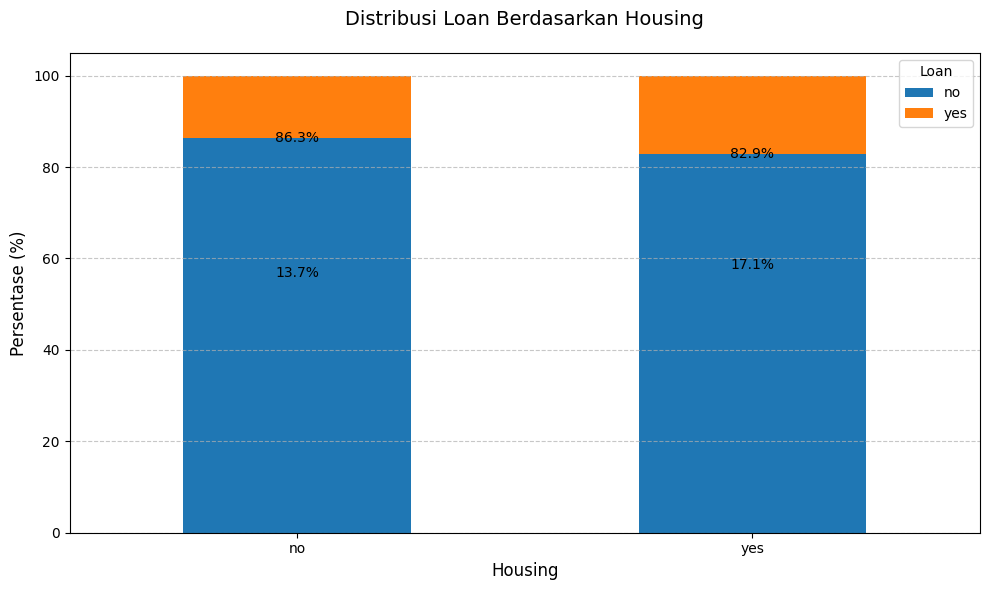

In [102]:
# Menghitung distribusi loan berdasarkan housing
distribusi = pd.crosstab(df['housing'], df['loan'], normalize='index') * 100  # Dalam persentase
distribusi_count = pd.crosstab(df['housing'], df['loan'])  # Dalam jumlah
print("Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):")
print(distribusi_count)
print("\nDistribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):")
print(distribusi.round(2))
plt.figure(figsize=(10, 6))
distribusi.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title("Distribusi Loan Berdasarkan Housing", fontsize=14, pad=20)
plt.xlabel("Housing", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.legend(title="Loan", loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label persentase di atas bar
for i, housing in enumerate(distribusi.index):
    for j, loan in enumerate(distribusi.columns):
        value = distribusi.loc[housing, loan]
        if value > 0:  # Hanya tampilkan label jika nilai > 0
            plt.text(i, distribusi.iloc[i, :j+1].sum() - distribusi.iloc[i, :j].sum()/2, 
                     f'{value:.1f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [103]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17879
0      no   no  16057
3     yes  yes   3691
1      no  yes   2557


Dari sini dapat kita lihat, yang mendominasi distribusinya ada pada nasabah yang memiliki `housing` = `"yes"` dan `loan` = `"no"`. namun jika mengisi dengan mediannya masih belum dapat dilakukan juga, karena ini masih kurang masuk akal. bagaimana jika kita asumsikan bahwa nasabah yang memiliki `housing` = `"unknown"` dan `loan` = `"unknown"`, memang tidak pernah meemiliki tanggunggan pada keduanya, hal ini cukup masuk akal sehingga data `housing` dan `loan`-nya menjadi `"unknown"`, karena mereka memang tidak pernah memiliki tanggungan pada 2 hal tersebut

In [104]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' yes dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]

specific_group_df = df_cleaned[(df_cleaned['housing'] == 'yes') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")

Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 17879

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     10730
single       5119
divorced     2005
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           4516
blue-collar      3946
technician       3014
services         1700
management       1244
retired           737
entrepreneur      656
self-employed     623
unemployed        462
housemaid         454
student           387
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      5343
high.school            4083
basic.9y               2640
professional.course    2350
basic.4y               1753
basic.6y                973
illiterate                8
Name: count, dtype: int64




In [105]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' no dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]
specific_group_df = df_cleaned[(df_cleaned['housing'] == 'no') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 16057

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     9828
single      4377
divorced    1810
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           3965
blue-collar      3700
technician       2589
services         1565
management       1170
retired           697
self-employed     563
entrepreneur      558
housemaid         423
unemployed        376
student           323
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      4613
high.school            3766
basic.9y               2371
professional.course    1972
basic.4y               1681
basic.6y                928
illiterate                7
Name: count, dtype: int64




Setelah kita analisa lebih dalam dari kedua distribusi data diatas, dapat kita lihat kedua-dua-nya tidak memiliki perbedaan sama sekali. Keduanya sama-sama didominasi oleh nasabah yang sudah `"married"`, bekerja sebagai `"admin"` atau `"blue-collar"`, dan memiliki pendidikan `"university.degree"` atau `"highschool"`. sekarang coba kita bandingkan dengan nasabah yang memiliki `housing` = `"unknown"` dan `loan` = `"unknown"`

In [106]:
# menampilkan nasabah yang memiliki 'housing' dan 'loan' unknown
specific_group_df = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]

# Menampilkan analisis untuk kelompok tersebut
print(f"Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.
Total nasabah dalam kelompok ini: 0

--- Distribusi Berdasarkan Status Pernikahan ---
Series([], Name: count, dtype: int64)


--- Distribusi Berdasarkan Pekerjaan ---
Series([], Name: count, dtype: int64)


--- Distribusi Berdasarkan Tingkat Pendidikan ---
Series([], Name: count, dtype: int64)




Setelah kita cek kembali, ternyata yang memiliki nilai `"unknown"`, tidak memiliki perbedaan dengan dua distribusi diatas. sebenarnya bisa saja jika kita masukkan nilai `"unknown"` dengan menggunakan modus, namun, nilai unknown ini bisa saja dikarenakan kedua nasabah tersebut memang tidak memiliki tanggungan pada `loan` dan `housing`. Sebagaimana kita lihat diatas, nasabah yang memiliki `housing` = `"no"` dan `loan` = `"no"` juga hanya berbeda sekitar **1000 orang**. sehingga akan kita putuskan untuk mengisinya dengan `"no"` pada kedua kolom tersebut

In [107]:
# Mengganti nilai 'unknown' menjadi 'no' pada kolom 'housing' dan 'loan'
df['housing'] = df['housing'].replace({'unknown': 'no'})
df['loan'] = df['loan'].replace({'unknown': 'no'})

In [108]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17879
0      no   no  16057
3     yes  yes   3691
1      no  yes   2557


In [110]:
unknown_counts = {}
for col in df.columns:
    if 'unknown' in df[col].unique():
        # Jika ada, lakukan penghitungan yang lebih intensif
        count = df[col][df[col] == 'unknown'].count()
        if count > 0:
            # Simpan nama kolom dan jumlahnya
            unknown_counts[col] = count
sorted_unknown_counts = sorted(unknown_counts.items(), key=lambda item: item, reverse=True)
for col, count in sorted_unknown_counts:
    print(f"Kolom '{col}' memiliki {count} nilai 'unknown'.")

Berdasarkan hasil eksplorasi terhadap dataset, terdapat beberapa atribut yang memiliki **nilai kosong (null)** akibat proses konversi dari `"unknown"` ke `NaN`. Atribut-atribut dengan nilai null tersebut perlu ditangani agar tidak mengganggu proses pemodelan dan analisis lebih lanjut.

Berikut adalah daftar fitur dengan nilai null dan persentasenya:

1. `job` memiliki **330** nilai null (**0.80%**)

2. `marital` memiliki **80** nilai null (**0.19%**)

3. `education` memiliki **1,730** nilai null (**4.20%**)

4. `default` memiliki jumlah null tertinggi, yakni **8,596** nilai (**20.88%**)

5. `housing` memiliki **990** nilai null (**2.40%**)

6. `loan` memiliki **990** nilai null (**2.40%**)

Nilai null pada atribut-atribut ini umumnya berasal dari entri yang sebelumnya berisi `"unknown"`, dan kini ditandai sebagai `NaN` untuk mempermudah proses imputasi dan analisis dengan pustaka seperti `missingno`.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library `missingno`

reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [112]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#### **Bar Plot**

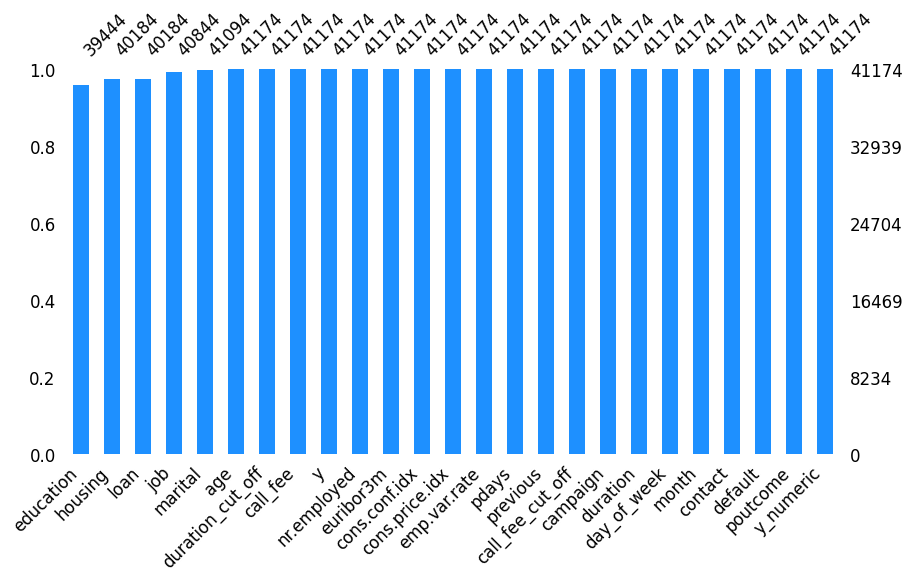

In [113]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

#### **Matriks Plot**

<Axes: >

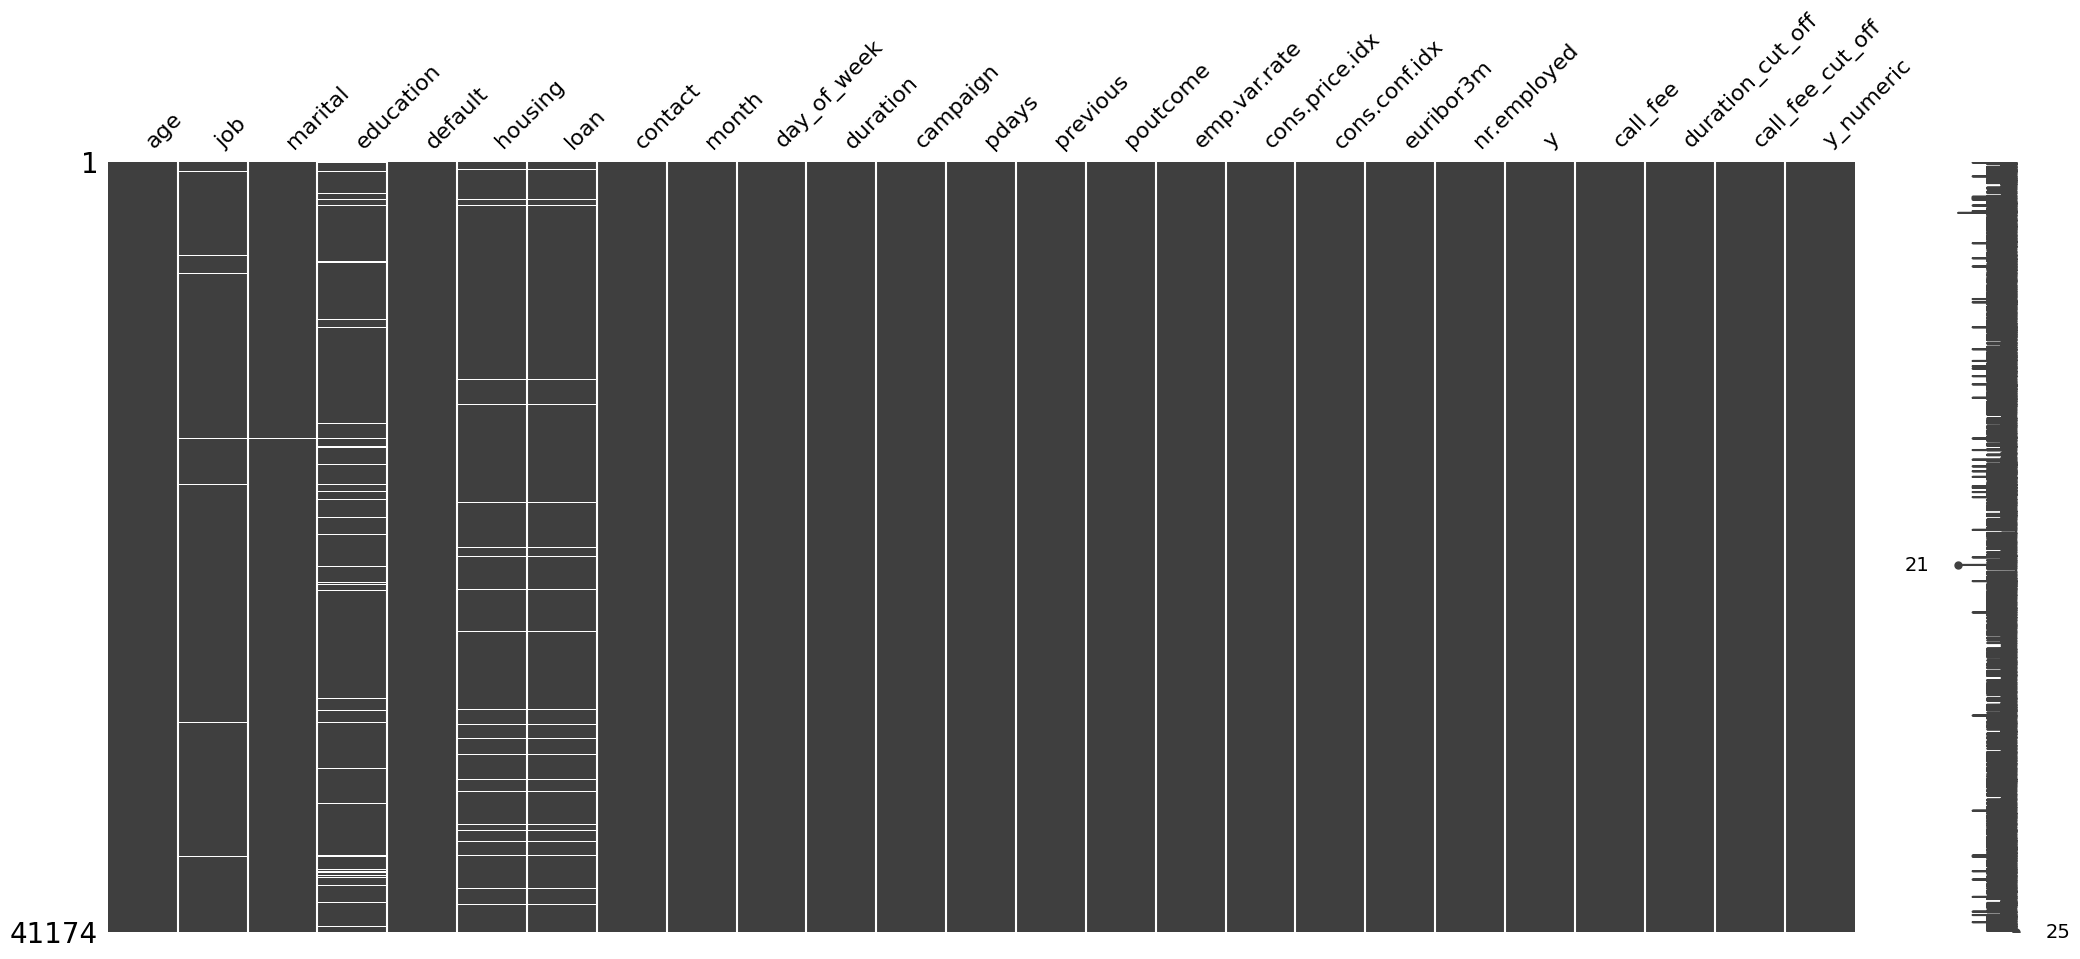

In [114]:
missingno.matrix(df)

#### **Heatmap**
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

* **-1** - **Korelasi Negatif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
* **0** - **Tidak ada korelasi** yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
* **1** - **Korelasi Positif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

<Axes: >

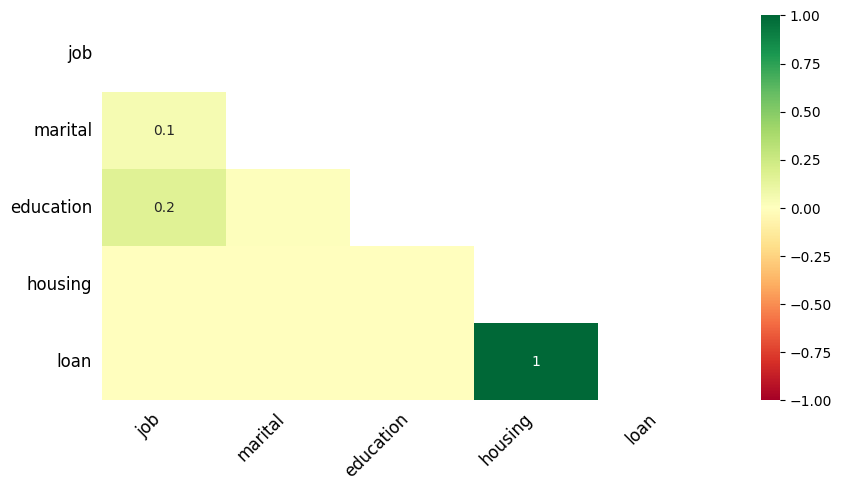

In [115]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Gambar heatmap di atas menggambarkan **korelasi antar kolom** yang memiliki nilai hilang (`null`) dalam dataset. Visualisasi ini membantu kita memahami apakah ada pola ketergantungan antar kolom yang kosong, yang bisa menjadi dasar strategi imputasi yang lebih tepat.

Beberapa insight penting dari heatmap tersebut:

1. Korelasi tertinggi muncul antara kolom `housing` dan `loan`, dengan nilai **1.0**, yang artinya **jika salah satu kolom missing, maka kolom lainnya juga pasti missing**. Ini menunjukkan hubungan yang sangat erat dan bisa dipertimbangkan untuk diimputasi secara bersamaan atau berdasarkan pola yang sama.

2. Korelasi rendah namun terdeteksi antara:

    1. `education` dan `job` sebesar **0.2**

    2. `education` dan `marital` sebesar **0.1**

    3. `default` dan `education` sebesar **0.1**

    Meskipun rendah, hal ini bisa menjadi pertimbangan tambahan ketika kita menyusun strategi imputasi berdasarkan relasi antar fitur.

3. Fitur seperti `job`, `marital`, dan `default` memiliki nilai korelasi yang sangat rendah antar satu sama lain, menunjukkan bahwa missing value di kolom tersebut terjadi secara **relatif independen**.

Secara keseluruhan, heatmap ini memberikan pemahaman bahwa **beberapa kolom memiliki keterkaitan dalam pola missing value-nya**, dan pendekatan imputasi berdasarkan korelasi ini akan lebih efektif dibandingkan imputasi global tanpa mempertimbangkan hubungan antar fitur.

#### **Dendogram**

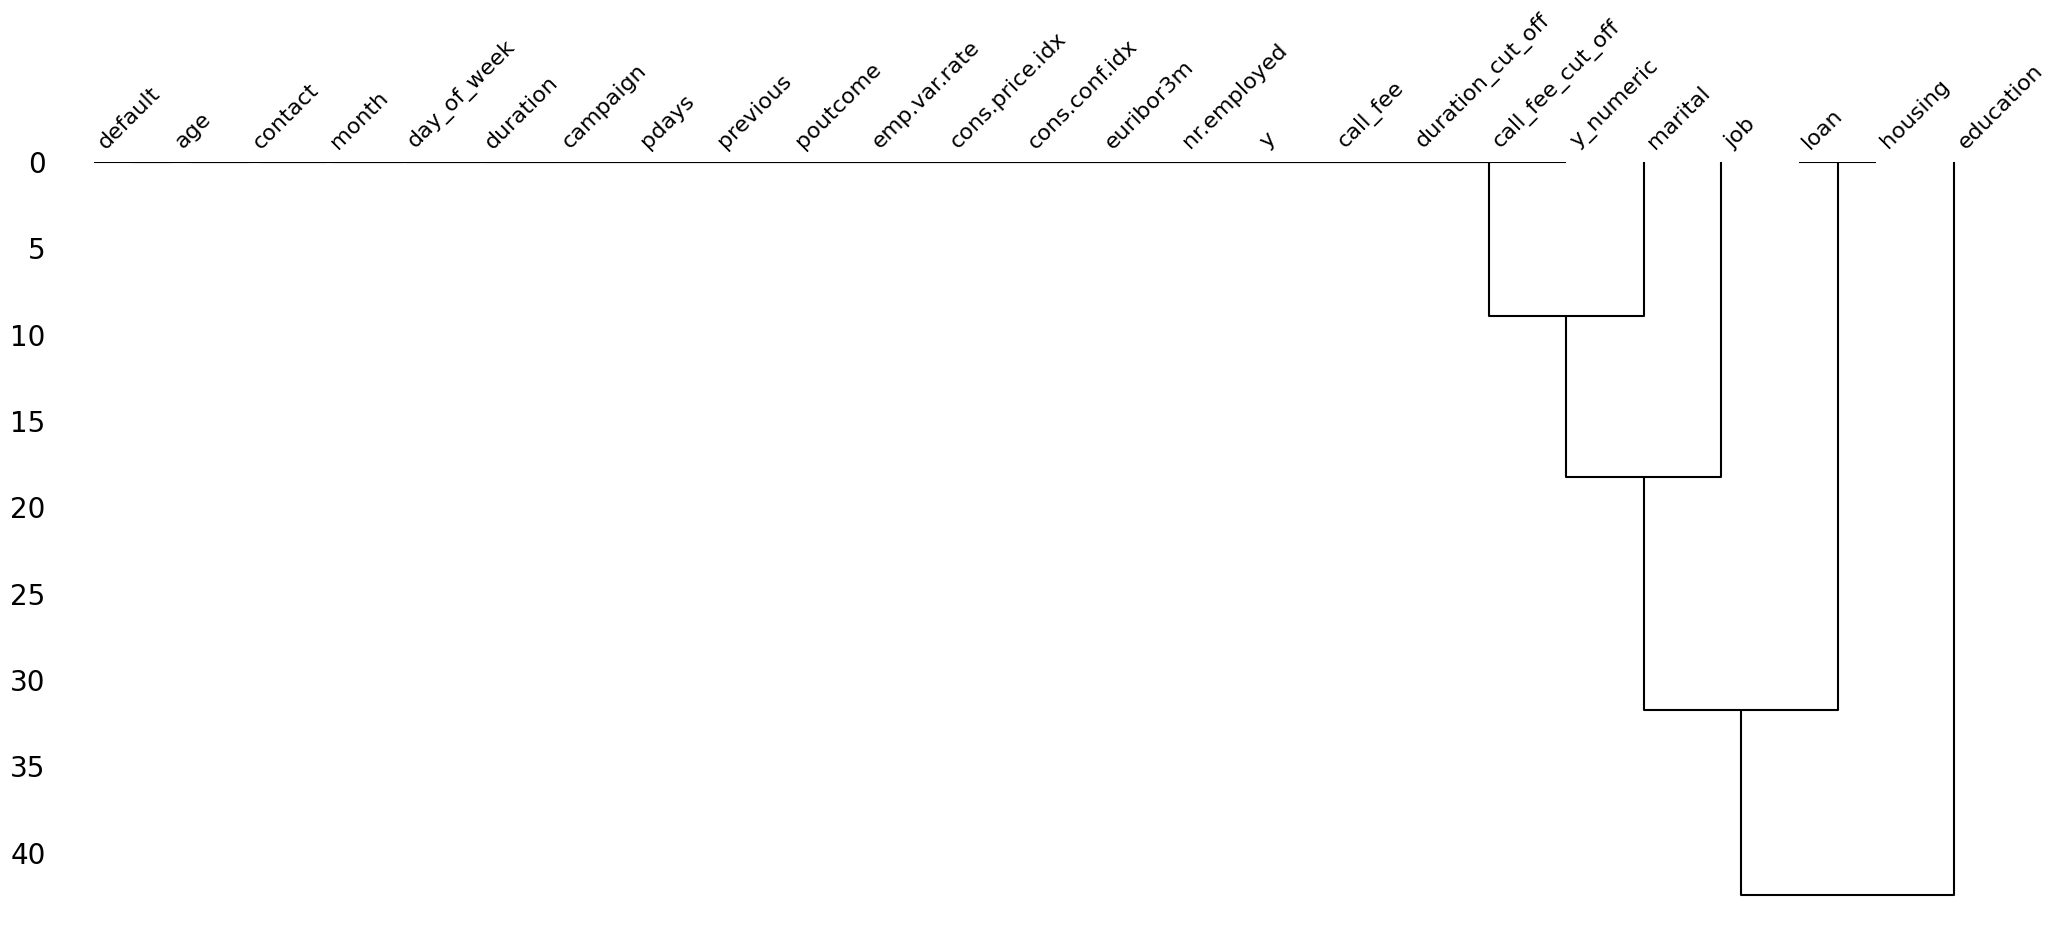

In [116]:
missingno.dendrogram(df)
plt.show()

Visualisasi dendogram di atas memberikan gambaran **struktur hierarki keterkaitan antar kolom** berdasarkan pola missing value yang ada dalam dataset. Dendogram ini berguna untuk mengelompokkan fitur-fitur yang cenderung memiliki pola missing yang **mirip atau terjadi bersamaan**.

Dari hasil dendogram dapat diperhatikan bahwa:

1. Kolom-kolom yang berada dalam **cabang yang sama atau berdekatan**, seperti `job`, `marital`, `loan`, `housing`, `education`, dan `default`, memiliki hubungan keterkaitan dalam hal keberadaan nilai `null`.

2. Kelompok tersebut menunjukkan bahwa **jika sebuah fitur memiliki missing value, fitur lain dalam grup tersebut juga cenderung memiliki missing value**.

3. Hal ini memberikan sinyal bahwa **strategi imputasi bisa dilakukan secara terarah** berdasarkan grup fitur tersebut, bukan secara individual.

Dengan mempertimbangkan hasil dendogram ini, kita akan melakukan **perbaikan nilai null secara bertahap**, dimulai dari fitur yang saling berkaitan secara hierarki, guna menjaga integritas dan konsistensi data.

 **Pembersihan nilai 'unknown' pada kolom 'default'**

In [117]:
df.default.replace('unknown','no',inplace=True)

Kita isi kolom `"default"` yang memiliki nilai unknown dengan `"no"`, kita asumsikan bahwa orang yang memiliki nilai `"unknown"` memang tidak memiliki kredit macet, selain itu, hal ini juga merupakan alasan yang logis, sebab sebagian besar nasabah di bank memang tidak memiliki kredit macet

#### **Pembersihan nilai 'unknown' pada kolom 'job'**

In [118]:
#mengecek distribusi nasabah dengan job 'unknown' berdasarkan pekerjaannya
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
Series([], Name: count, dtype: int64)


In [119]:
basic_education_levels = ['basic.4y', 'basic.6y', 'basic.9y']
basic_education_df = df[df['education'].isin(basic_education_levels)]
basic_education_known_jobs_df = basic_education_df[basic_education_df['job'] != 'unknown']
job_distribution = basic_education_known_jobs_df.groupby('education')['job'].value_counts()
print(job_distribution)

education  job          
basic.4y   blue-collar      2317
           retired           597
           housemaid         474
           entrepreneur      137
           services          132
           unemployed        112
           management        100
           self-employed      93
           admin.             77
           technician         58
           student            26
basic.6y   blue-collar      1425
           services          226
           admin.            151
           technician         87
           management         85
           housemaid          77
           retired            75
           entrepreneur       71
           unemployed         34
           self-employed      25
           student            13
basic.9y   blue-collar      3623
           admin.            499
           services          388
           technician        384
           self-employed     220
           entrepreneur      210
           unemployed        186
           managem

Dari sini dapat kita ketahui bahwa seorang nasabah yang memiliki education `basic` dari 4 year hingga 9 years, kebanyakan bekerja sebagai `"blue-collar"`. dari sini dapat kita isi nasabah yang memiliki nilai `"unknown"` pada kolom jobnya, dan memiliki education `"basic"` **4 year hingga 9 year** menjadi sebagai pekerja `"blue-collar"`

In [120]:
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'

In [121]:
df.loc[(df['job'] == 'unknown') & (df['education']=='high.school'), 'job'] = 'admin.'
df.loc[(df['job'] == 'unknown') & (df['education']=='university.degree'), 'job'] = 'admin.'

Kita lakukan pengisian untuk nasabah yang memiliki education `"university.degree"` dan `"high.school"` dengan job `"admin"`, karena lulusan tersebut sebagian besar bekerja sebagai admin 

In [122]:
filtered_df = df[(df['age'] >= 60) & (df['job'] == 'unknown')]
count = len(filtered_df)
print(f"Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': {count}")

Jumlah nasabah berumur 60 tahun atau lebih dengan pekerjaan 'unknown': 0


Di sini kita cek nasabah yang memiliki umur **60 tahun** atau lebih, tetapi kolom pekerjaannya bernilai `"unknown"`. Terdapat setidaknya **23 nasabah yang berumur 60 tahun** atau lebih yang memiliki nilai `"unknown"` pada kolom `job`-nya.

In [123]:
age_60_df = df[df['age'] == 60]
age_60_known_jobs_df = age_60_df[age_60_df['job'] != 'unknown']
job_distribution = age_60_known_jobs_df['job'].value_counts()
print("Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:")
print(job_distribution)

Distribusi pekerjaan untuk nasabah yang berumur 60 tahun:
job
retired          107
admin.            59
management        28
blue-collar       23
technician        15
housemaid         13
self-employed     12
entrepreneur       9
services           6
unemployed         3
Name: count, dtype: int64


Dari sini dapat kita lihat, bahwa seorang nasabah yang memiliki umur **60 tahun** atau lebih telah pensiun atau `"retired"`, sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi `"retired"`

In [124]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

In [125]:
education_level = 'professional.course'
job_status = 'unknown'
filtered_df = df[(df['education'] == education_level) & (df['job'] == job_status)]
count = len(filtered_df)
print(f"Jumlah nasabah dengan pendidikan '{education_level}' dan pekerjaan '{job_status}': {count}")

Jumlah nasabah dengan pendidikan 'professional.course' dan pekerjaan 'unknown': 0


Di sini kita cek nasabah yang memiliki education `"professional.course"`, tetapi kolom pekerjaannya bernilai `"unknown"`. Terdapat setidaknya **23 nasabah yang berumur 60 tahun** atau lebih yang memiliki nilai `"unknown"` pada kolom `job`-nya.

In [126]:
education_level = 'professional.course'
prof_course_df = df[df['education'] == education_level]
prof_course_known_jobs_df = prof_course_df[prof_course_df['job'] != 'unknown']
job_distribution = prof_course_known_jobs_df['job'].value_counts()
print(f"Distribusi pekerjaan untuk nasabah dengan pendidikan '{education_level}':")
print(job_distribution)

Distribusi pekerjaan untuk nasabah dengan pendidikan 'professional.course':
job
technician       3317
blue-collar       453
admin.            363
retired           241
services          218
self-employed     168
unemployed        142
entrepreneur      135
management         89
housemaid          59
student            43
Name: count, dtype: int64


Dari sini dapat kita lihat, bahwa seorang nasabah yang memiliki education `"professional.course"` sebagian besar memiliki pekerjaan sebagai `"technician"`, sehingga kita dapat mengisi permasalahan diatas tadi dengan menggantinya menjadi `"technician"`

In [127]:
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

Sekarang hanya tersisa nasabah yang memiliki job `"unknown"` akan tetapi  educationnya juga berisikan `"unknown"`. Hal ini cukup sulit untuk diisi, karena tidak adanya korelasi terhadap variabel lain, selain itu, data tersebut hanya berisikan sekitaran 117 nasabah saja, akan lebih baik untuk didrop saja.

In [128]:
# mendrop nasabah yang memiliki job 'unknown' beserta education 'unknown'
indeks_yang_dihapus = df[(df['job'] == 'unknown') & (df['education'] == 'unknown')].index
df.drop(indeks_yang_dihapus, inplace=True)

In [129]:
job_unknown_df = df[df['job'] == 'unknown']
education_distribution = job_unknown_df['education'].value_counts()
print("Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':")
print(education_distribution)

Distribusi Pendidikan untuk Nasabah dengan Pekerjaan 'Unknown':
Series([], Name: count, dtype: int64)


#### **Pembersihan nilai `"unknown"` pada kolom `"education"`**

In [130]:
unknown_education_df = df[df['education'] == 'unknown']
remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")
print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)

Jumlah sisa nasabah dengan pendidikan 'unknown': 0

Distribusi berdasarkan 'Job' (Pekerjaan):
Series([], Name: count, dtype: int64)


Di sini kita lakukan distribusi nasabah yang memiliki education `"unknown"` berdasarkan pekerjannya

In [131]:
# Saring data untuk mengecualikan nilai 'unknown'
known_data_df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]
distribution_pivot = known_data_df.groupby('education')['job'].value_counts().unstack(fill_value=0)
education_totals = distribution_pivot.sum(axis=1)
sorted_distribution = distribution_pivot.loc[education_totals.sort_values(ascending=False).index]
print("Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):")
print(sorted_distribution)

Distribusi Pekerjaan Berdasarkan Tingkat Pendidikan (Diurutkan dari yang Paling Banyak):
job                  admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                                       
university.degree      5749           94           610        139        2063   
high.school            3329          878           234        174         298   
basic.9y                499         3623           210         94         166   
professional.course     363          453           135         59          89   
basic.4y                 77         2317           137        474         100   
basic.6y                151         1425            71         77          85   
illiterate                1            8             2          1           0   

job                  retired  self-employed  services  student  technician  \
education                                                                    
university.degree        

Dari sini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom education `"unknown"` yang memiliki pekerjaan sebagai `"admin"`, `"entrepeneur"`, `"management"`, serta `"employment"` menjadi `"university.degree"`, sebagaimana kita lihat diatas bahwa ke 4 pekerjaan tersebut didominasi oleh lulusan university, namun untuk jaga-jaga akan saya batasi pada nasabah yang memiliki umur minimal 20 tahun, karena seorang akan memasuki university setidaknya pada umur tersebut

In [132]:
# mengisi kolom education menjadi university.degree
target_jobs = ['self-employed', 'management', 'entrepreneur', 'admin.']
job_condition = df['job'].isin(target_jobs)
education_condition = df['education'] == 'unknown'
age_condition = df['age'] >= 20
combined_conditions = job_condition & education_condition & age_condition
df.loc[combined_conditions, 'education'] = 'university.degree'
df.loc[(df['job'] == 'unemployed') & (df['education'] == 'unknown'), 'education'] = 'university.degree'

Dari sini terlihat cukup masuk akal untuk mengisi nasabah dengan kolom education `"unknown"` yang memiliki pekerjaan sebagai `"sevices"` menjadi **highschool**, karena pekerjaan tersebut sendiri didominasi oleh nasabah yang memiliki education **highschool**, sehingga akan kita isi menjadi **highschool**. kemudian kita juga akan mengisi nasabah yang memiliki `job` sebagai `unemployed` menjadi university karena unemployed juga didominasi oleh lulusan university

In [133]:
#mengisi kolom education menjadi highschool
job_condition = df['job'] == 'services'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'high.school'

selanjutnya kita lakukan pengisian nasabah yang memiliki education `"unknown"` namun bekerja sebagai `"technician"`, karena `"technician"` didominasi oleh `"professional.course"` maka dapat kita asumsikan bahwa nasabah tersebut juga memiliki `education` = `"professional.course"`

In [134]:
# mengisi education menjadi professioanl.course 
job_condition = df['job'] == 'technician'
education_condition = df['education'] == 'unknown'
combined_conditions = job_condition & education_condition
df.loc[combined_conditions, 'education'] = 'professional.course'

Kita isi menjadi `"basic.9y"`. karena nasabah yang memiliki `education` tersebut bekerja sebagai `"blue-collar"`

In [135]:
##mengisi kolom education menjadi basic.9y
df.loc[(df['job'] == 'blue-collar') & (df['education'] == 'unknown'), 'education'] = 'basic.9y'

untuk pengisian yang memiliki `job` student ini agak sedikit rumit, karena akan kita gunakan umur mereka untuk mengisi kolom `education` sesuai dengan rata-rata education yang dimiliki oleh nasabah pada rentang umur tersebut.

Kita akan lakukan pengisian nasabah yang memiliki education `"unknown"` namun memiliki job sebagai student dengan menggunakan umurnya, jika umur nasabah tersebut <= 17 tahun maka akan kita isi dengan **highschool**, mengingat rentang umur highschool berada dikisaran tersebut, kita pilih **highschool** karena merupakan distribusi terbesar kedua setelah `"university.degree"`, jika berumur diatasnya akan kita asumsikan memiliki `education` =  `"university.degree"`. mengingat pada umur tersebut kemungkinan besar pendidikan yang sedang dijalani hanya ada `"university.degree"`


In [136]:
# mengisi nilai unknown menggunakan umurnya untuk menentukan edukasi nasabah
students_known_education = df[(df['job'] == 'student') & (df['education'] != 'unknown')]
def get_imputed_education(age):
    """
    Fungsi ini mengembalikan tingkat pendidikan yang paling mungkin berdasarkan umur mahasiswa.
    """
    if age <= 17:
        return 'high.school'  # Jenjang SMA
    elif age <= 22:
        return 'university.degree' # kita asumsikan berada di rentang S1 -S3
    else:
        # Untuk mahasiswa yang lebih tua, kita gunakan modus dari data referensi
        older_student_mode = students_known_education[students_known_education['age'] > 22]['education'].mode()
        if not older_student_mode.empty:
            return older_student_mode[0]
        else:
            return 'university.degree' # Nilai cadangan jika tidak ada referensi
target_rows_mask = (df['job'] == 'student') & (df['education'] == 'unknown')

imputed_values = df.loc[target_rows_mask, 'age'].apply(get_imputed_education)
df.loc[target_rows_mask, 'education'] = imputed_values
print("Verifikasi setelah imputasi:")
print(f"Jumlah mahasiswa dengan pendidikan 'unknown': {(df[df['job'] == 'student']['education'] == 'unknown').sum()}")

Verifikasi setelah imputasi:
Jumlah mahasiswa dengan pendidikan 'unknown': 0


In [137]:
#mengisi kolom menjadi basic.4y
df.loc[(df['job'] == 'housemaid') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'retired') & (df['education'] == 'unknown'), 'education'] = 'basic.4y'

Kita isi nasabah yang memiliki education `"unknown"` namun bekerja sebagai `"housemaid"` atau `"retired"` menjadi `"basic.4y"`. karena kita lihat dari data diatas, bahwa orang yang bekerja sebagai `"housemaid"` dan `"retired"` didominasi oleh pendidikan `"basic.4y"`

In [138]:
#kita cek sisa nasabah yang memiliki education 'unknown'
unknown_education_df = df[df['education'] == 'unknown']

remaining_count = len(unknown_education_df)
print(f"Jumlah sisa nasabah dengan pendidikan 'unknown': {remaining_count}")

print("\nDistribusi berdasarkan 'Job' (Pekerjaan):")
job_distribution = unknown_education_df['job'].value_counts()
print(job_distribution)

Jumlah sisa nasabah dengan pendidikan 'unknown': 0

Distribusi berdasarkan 'Job' (Pekerjaan):
Series([], Name: count, dtype: int64)


untuk retired akan kita isi dengan nilai modus saja, yaitu dengan `"basic.4y"`. karena data ini cukup membingungkan untuk diisi, tidak ada korelasi yang dapat ditemukan dengan data-data yang ada saat ini

#### **Pembersihan nilai `"unknown"` pada kolom `marital`**

In [139]:
#mengecek distribusi nasabah pada kolom 'marital'
marital_distribution = df['marital'].value_counts()

# 2. Cetak hasilnya ke konsol dengan judul yang deskriptif.
print("Distribusi nasabah berdasarkan marital:")
print(marital_distribution)

Distribusi nasabah berdasarkan marital:
marital
married     24919
single      11564
divorced     4611
Name: count, dtype: int64


Di sini dapat kita ketahui, untuk kolom `marital` sendiri didominasi dengan `"married"`, dikarenakan pada kolom marital hanya terdapat 80 yang bernilai `"unknown"`, jadi dapat kita isi dengan nilai modusnya saja

In [140]:
# mengisi kolom marital dengan modus
marital_mode = df[df['marital'] != 'unknown']['marital'].mode()[0]
df['marital'].replace('unknown', marital_mode, inplace=True)

#### **nilai `"unknown"` pada kolom `loan` dan `housing`**

untuk kolom `loan` dan `housing` yang memiliki nilai `"unknown"` ini sebenarnya agak cukup tricky, dikarenakan kolom loan dengan nilai `"unknown"` juga akan memiliki kolom `housing` dengan nilai `"unknown"` juga, hal ini dapat dilihat menggunakan visualisasi dibawah

Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):
loan        no   yes
housing             
no       16057  2557
yes      17879  3691

Distribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):
loan        no    yes
housing              
no       86.26  13.74
yes      82.89  17.11


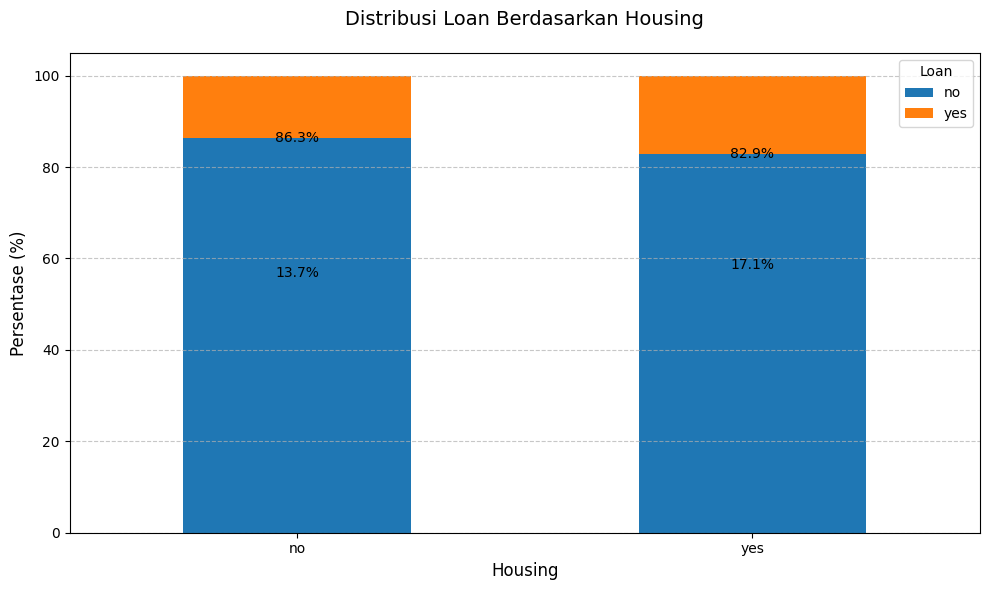

In [141]:
# Menghitung distribusi loan berdasarkan housing
distribusi = pd.crosstab(df['housing'], df['loan'], normalize='index') * 100  # Dalam persentase
distribusi_count = pd.crosstab(df['housing'], df['loan'])  # Dalam jumlah
print("Distribusi Kolom 'loan' Berdasarkan 'housing' (Jumlah):")
print(distribusi_count)
print("\nDistribusi Kolom 'loan' Berdasarkan 'housing' (Persentase):")
print(distribusi.round(2))
plt.figure(figsize=(10, 6))
distribusi.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title("Distribusi Loan Berdasarkan Housing", fontsize=14, pad=20)
plt.xlabel("Housing", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.legend(title="Loan", loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label persentase di atas bar
for i, housing in enumerate(distribusi.index):
    for j, loan in enumerate(distribusi.columns):
        value = distribusi.loc[housing, loan]
        if value > 0:  # Hanya tampilkan label jika nilai > 0
            plt.text(i, distribusi.iloc[i, :j+1].sum() - distribusi.iloc[i, :j].sum()/2, 
                     f'{value:.1f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [142]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17879
0      no   no  16057
3     yes  yes   3691
1      no  yes   2557


darisini dapat kita lihat, yang mendominasi distribusinya ada pada nasabah yang memiliki `housing` = `"yes"` dan `loan` = `"no"`. namun jika mengisi dengan mediannya masih belum dapat dilakukan juga, karena ini masih kurang masuk akal. bagaimana jika kita asumsikan bahwa nasabah yang memiliki `housing` = `"unknown"` dan `loan` = `"unknown"`, memang tidak pernah meemiliki tanggunggan pada keduanya, hal ini cukup masuk akal sehingga data `housing` dan `loan`-nya menjadi `"unknown"`, karena mereka memang tidak pernah memiliki tanggungan pada 2 hal tersebut

In [143]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' yes dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]

specific_group_df = df_cleaned[(df_cleaned['housing'] == 'yes') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")

Menganalisa profil nasabah DENGAN KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 17879

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     10730
single       5119
divorced     2005
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           4516
blue-collar      3946
technician       3014
services         1700
management       1244
retired           737
entrepreneur      656
self-employed     623
unemployed        462
housemaid         454
student           387
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      5343
high.school            4083
basic.9y               2640
professional.course    2350
basic.4y               1753
basic.6y                973
illiterate                8
Name: count, dtype: int64




In [144]:
# kita coba tampilkan distribusi nasabah yang memiliki 'housing' no dan 'loan' no berdasarkan marital, job, dan education
df_cleaned = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown')]
specific_group_df = df_cleaned[(df_cleaned['housing'] == 'no') & (df_cleaned['loan'] == 'no')]

print(f"Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah TANPA KPR dan TANPA Pinjaman.
Total nasabah dalam kelompok ini: 16057

--- Distribusi Berdasarkan Status Pernikahan ---
marital
married     9828
single      4377
divorced    1810
Name: count, dtype: int64


--- Distribusi Berdasarkan Pekerjaan ---
job
admin.           3965
blue-collar      3700
technician       2589
services         1565
management       1170
retired           697
self-employed     563
entrepreneur      558
housemaid         423
unemployed        376
student           323
Name: count, dtype: int64


--- Distribusi Berdasarkan Tingkat Pendidikan ---
education
university.degree      4613
high.school            3766
basic.9y               2371
professional.course    1972
basic.4y               1681
basic.6y                928
illiterate                7
Name: count, dtype: int64




Setelah kita analisa lebih dalam dari kedua distribusi data diatas, dapat kita lihat kedua-dua-nya tidak memiliki perbedaan sama sekali. Keduanya sama-sama didominasi oleh nasabah yang sudah `"married"`, bekerja sebagai `"admin"` atau `"blue-collar"`, dan memiliki pendidikan `"university.degree"` atau `"highschool"`. Sekarang coba kita bandingkan dengan nasabah yang memiliki `housing` = `"unknown"` dan `loan` = `"unknown"`

In [145]:
# menampilkan nasabah yang memiliki 'housing' dan 'loan' unknown
specific_group_df = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]

# Menampilkan analisis untuk kelompok tersebut
print(f"Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.")
print(f"Total nasabah dalam kelompok ini: {len(specific_group_df)}\n")

print("--- Distribusi Berdasarkan Status Pernikahan ---")
print(specific_group_df['marital'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Pekerjaan ---")
print(specific_group_df['job'].value_counts())
print("\n")

print("--- Distribusi Berdasarkan Tingkat Pendidikan ---")
print(specific_group_df['education'].value_counts())
print("\n")


Menganalisa profil nasabah dengan KPR 'unknown' dan Pinjaman 'unknown'.
Total nasabah dalam kelompok ini: 0

--- Distribusi Berdasarkan Status Pernikahan ---
Series([], Name: count, dtype: int64)


--- Distribusi Berdasarkan Pekerjaan ---
Series([], Name: count, dtype: int64)


--- Distribusi Berdasarkan Tingkat Pendidikan ---
Series([], Name: count, dtype: int64)




Setelah kita cek kembali, ternyata yang memiliki nilai `"unknown"`, tidak memiliki perbedaan dengan dua distribusi diatas. sebenarnya bisa saja jika kita masukkan nilai unknown dengan menggunakan modus, namun, nilai `"unknown"` ini bisa saja dikarenakan kedua nasabah tersebut memang tidak memiliki tanggungan pada `loan` dan `housing`. Sebagaimana kita lihat diatas, nasabah yang memiliki `housing` dan `loan` = `"no"` juga hanya berbeda sekitar 1000 orang. sehingga akan kita putuskan untuk mengisinya dengan `"no"` pada kedua kolom tersebut

In [146]:
# Mengganti nilai 'unknown' menjadi 'no' pada kolom 'housing' dan 'loan'
df['housing'] = df['housing'].replace({'unknown': 'no'})
df['loan'] = df['loan'].replace({'unknown': 'no'})

In [147]:
#menampilkan distribusi nasabah berdasarkan kolom 'loan' dan 'housing']
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17879
0      no   no  16057
3     yes  yes   3691
1      no  yes   2557


In [148]:
#kita cek kembali apakah masih terdapat kolom yang memiliki nilai unknown, jika sudah tidak ada akan kita lanjutkan ke progress selanjutnya

for col in df.columns:
    if 'unknown' in df[col].unique():
        count = df[col][df[col] == 'unknown'].count()
        if count > 0:
            unknown_counts[col] = count
sorted_unknown_counts = sorted(unknown_counts.items(), key=lambda item: item, reverse=True)
for col, count in sorted_unknown_counts:
    print(f"Kolom '{col}' memiliki {count} nilai 'unknown'.")

In [149]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])

Sisa missing value setelah imputasi global terakhir:
job           330
marital        80
education    1730
housing       990
loan          990
dtype: int64


In [150]:
# Imputasi global terakhir menggunakan mode
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
Markdown("Imputasi global terakhir menggunakan mode")

Imputasi global terakhir menggunakan mode

penanganan untuk sisa-sisa missing value menggunakan modus

In [152]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])

Sisa missing value setelah imputasi global terakhir:
Series([], dtype: int64)


#### **Penyimpanan Data Perubahan¶**

In [180]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-clean.csv**

#### **Pembacaan Ulang DataFrame**

In [4]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


## **Explonatory Data Analys (EDA)**

### **Read file**

In [5]:
output_path = "../data/revision/bank-additional-full-data-analyst.csv"

### **Read file for Data Analyst**

In [6]:
df = pd.read_csv(output_path, sep=';')
# df['y'] = df['y'].map({'yes': 1, 'no': 0})
# df['default'] = df['default'].map({'yes': 1, 'no': 0})
# df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
# df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
# df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.5,170,0.3
1,57,services,married,high.school,0,0,0,0,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.3,120,0.2
2,37,services,married,high.school,0,1,0,0,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.4,170,0.3
3,40,admin.,married,basic.6y,0,0,0,0,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.3,120,0.2
4,56,services,married,high.school,0,0,1,0,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1.8,300,1.5
41172,46,blue-collar,married,professional.course,0,0,0,1,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,2.1,170,0.9
41173,56,retired,married,university.degree,0,1,0,1,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1.2,170,0.9
41174,44,technician,married,professional.course,0,0,0,1,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,2.4,300,1.5


In [7]:
df = df.drop(columns=['duration', 'call_fee', 'duration_cut_off', 'call_fee_cut_off'], errors='ignore')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,11,5,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [23]:
df = df.drop(columns=['month', 'day_of_week'], errors='ignore')
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [153]:
output_path = "../data/revision/bank-additional-full-data-analyst2.csv"

In [25]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-data-analyst2.csv**

In [154]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


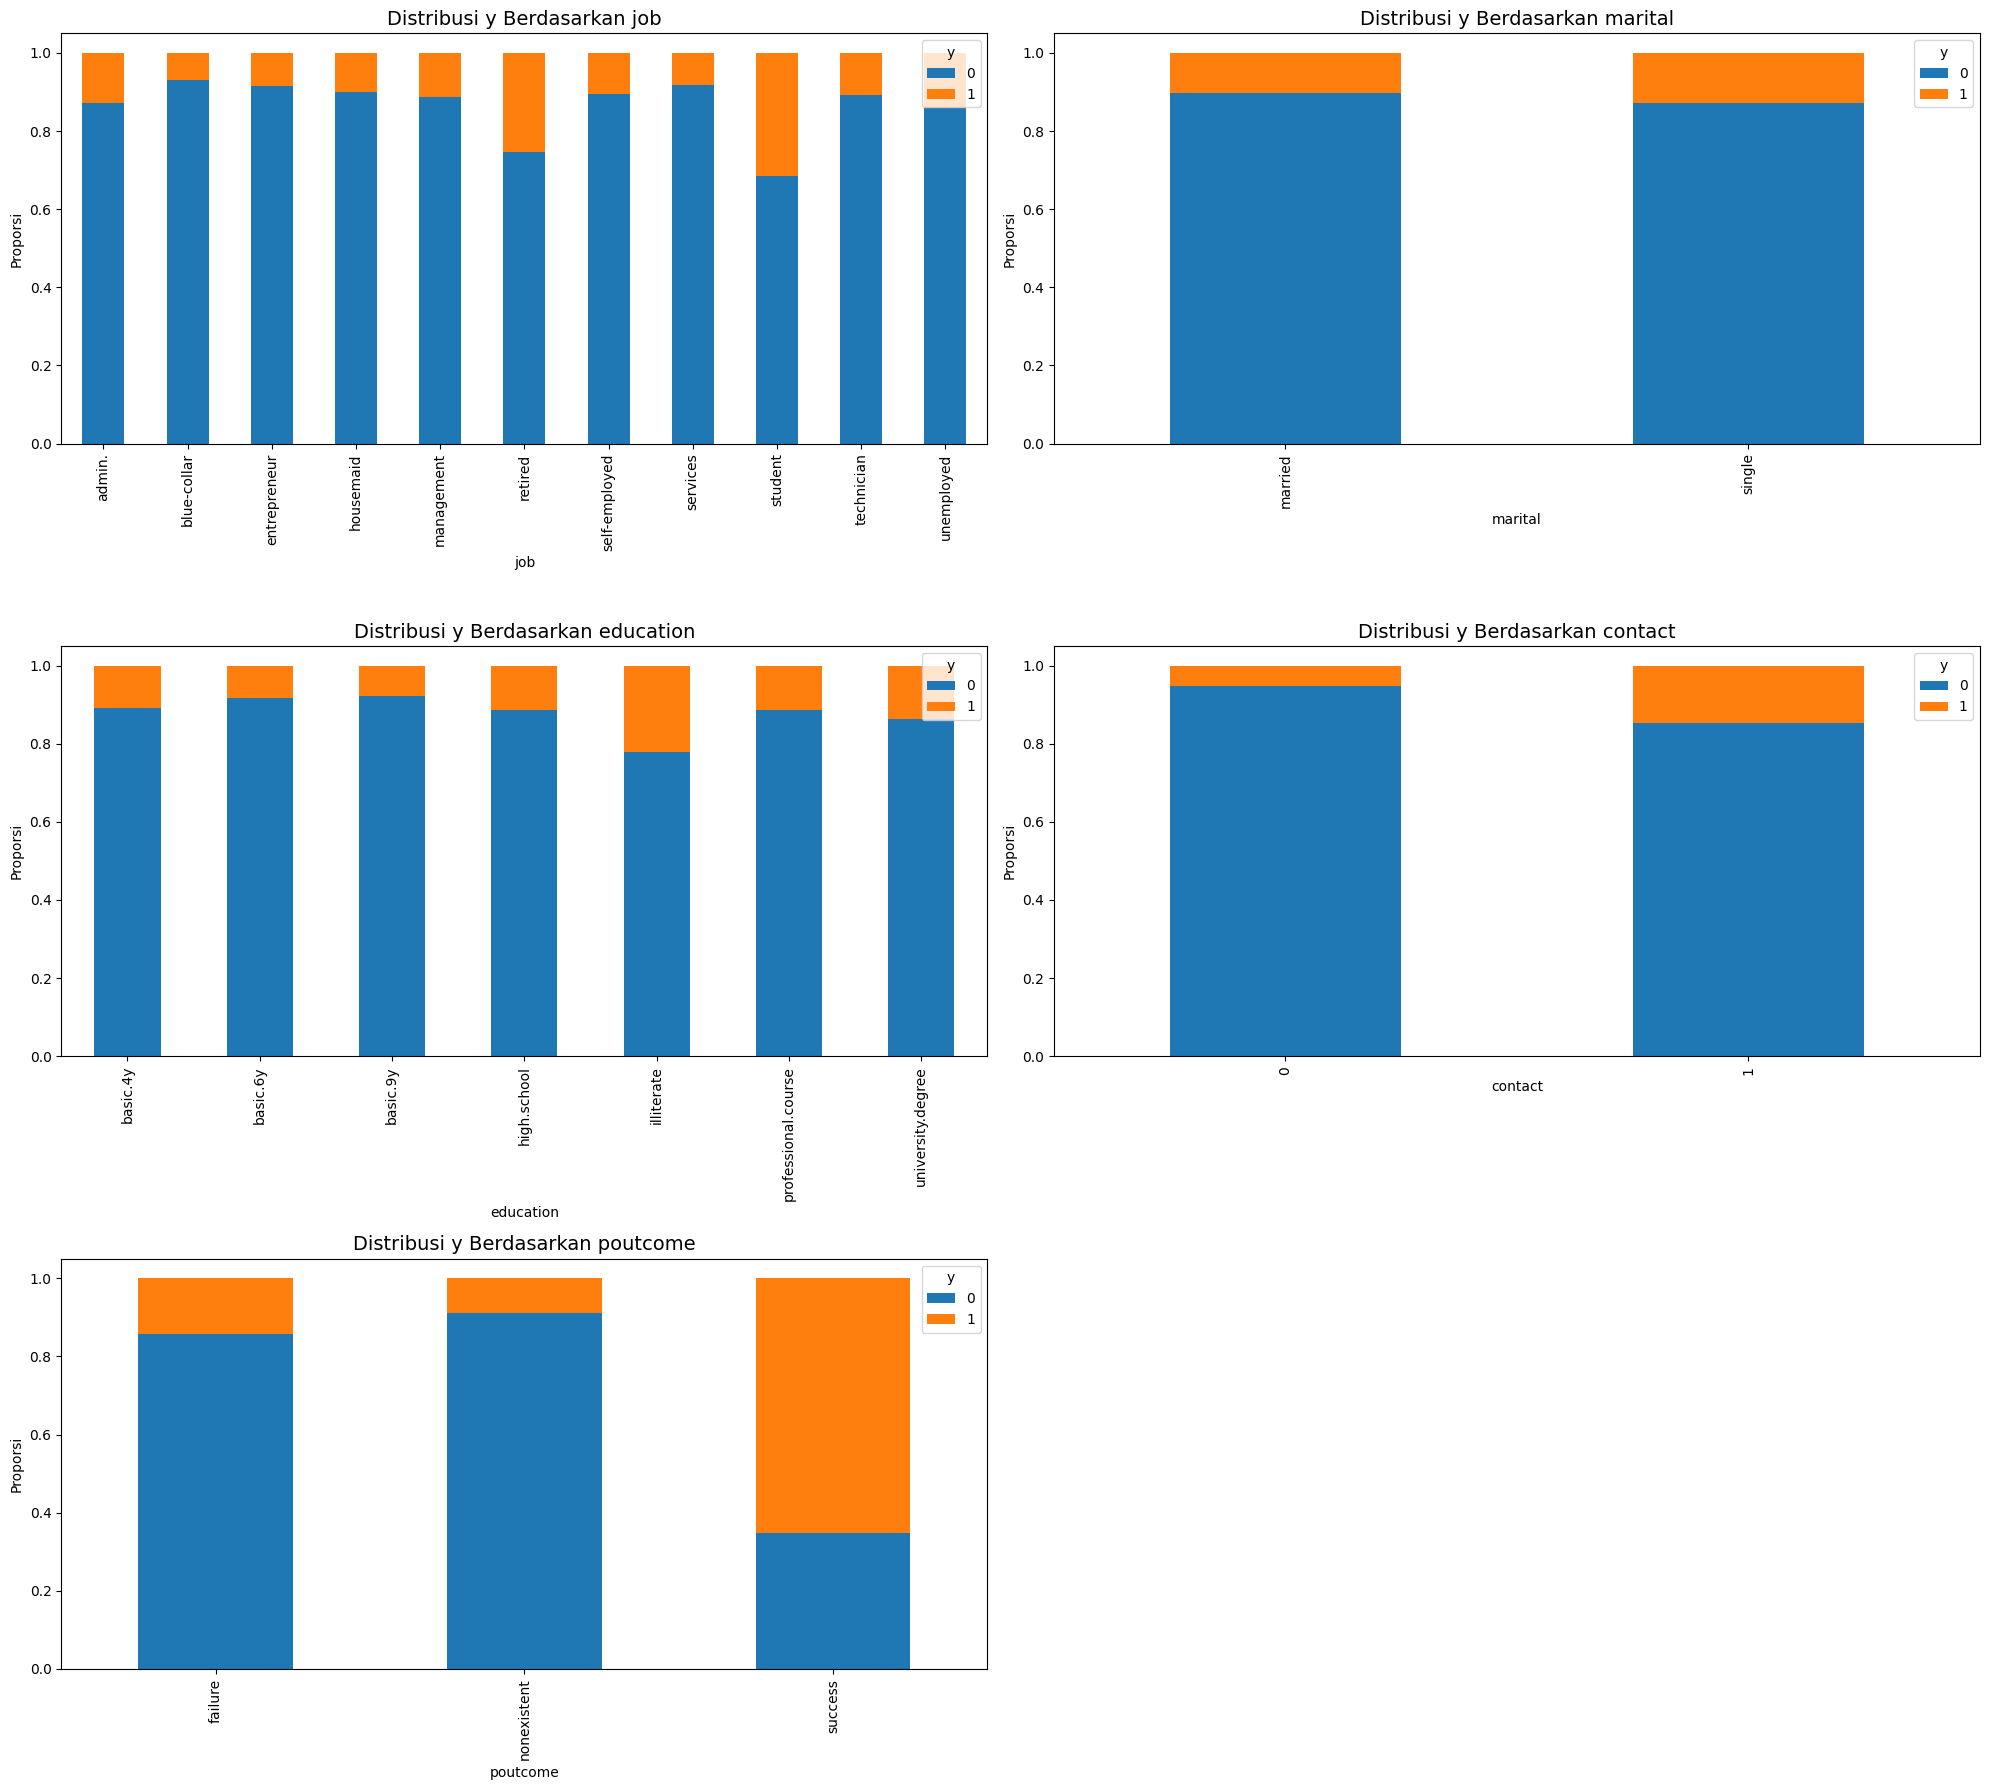

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    prop = pd.crosstab(df[col], df['y'], normalize='index')
    prop.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribusi y Berdasarkan {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.legend(title='y', loc='upper right')

plt.tight_layout()
plt.show()


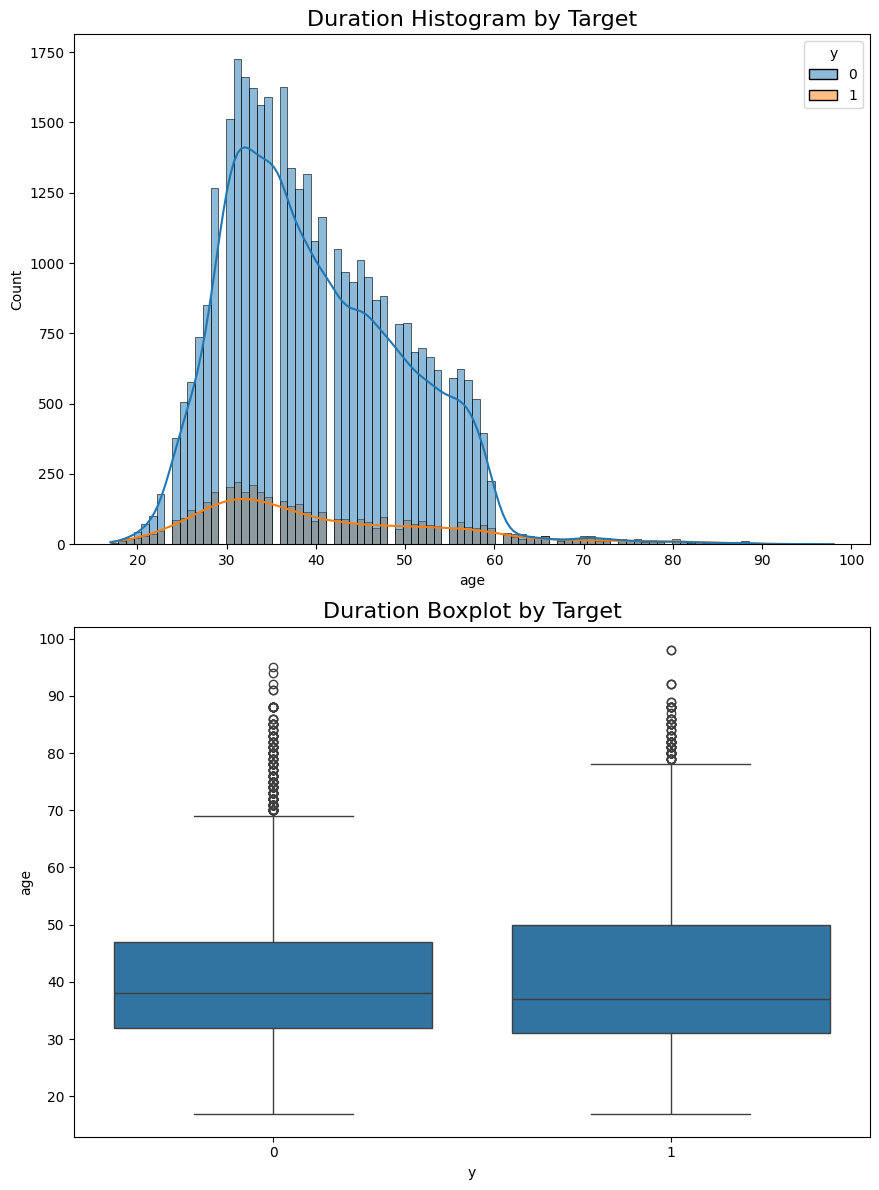

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(17, 12))

# Histogram 1: duration
plt.subplot(221)
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.title('Duration Histogram by Target', fontsize=16)

# Boxplot 1: duration
plt.subplot(223)
sns.boxplot(data=df, y='age', x='y')
plt.title('Duration Boxplot by Target', fontsize=16)

plt.tight_layout()
plt.show()

Berdasarkan histogram dan boxplot di atas, terlihat bahwa distribusi **usia nasabah (`age`)** berbeda antara nasabah yang tidak tertarik membuka deposito (`y = "no"`) dan yang tertarik (`y = "yes"`).

Nasabah yang tertarik (`y = "yes"`) **cenderung berada pada rentang usia 30 hingga 60 tahun**, meskipun jumlahnya jauh lebih sedikit dibandingkan dengan nasabah yang tidak tertarik. Pola distribusi untuk kedua kelas target memiliki bentuk yang mirip, namun frekuensi `"yes"` lebih terkonsentrasi di usia menengah.

Tidak terdapat perbedaan ekstrem antara kelompok usia tertentu terhadap target, namun pola ini tetap menunjukkan bahwa usia dapat menjadi **salah satu fitur relevan** dalam model prediksi konversi, terutama jika dikombinasikan dengan fitur lain seperti pekerjaan, status pinjaman, atau riwayat kampanye sebelumnya.

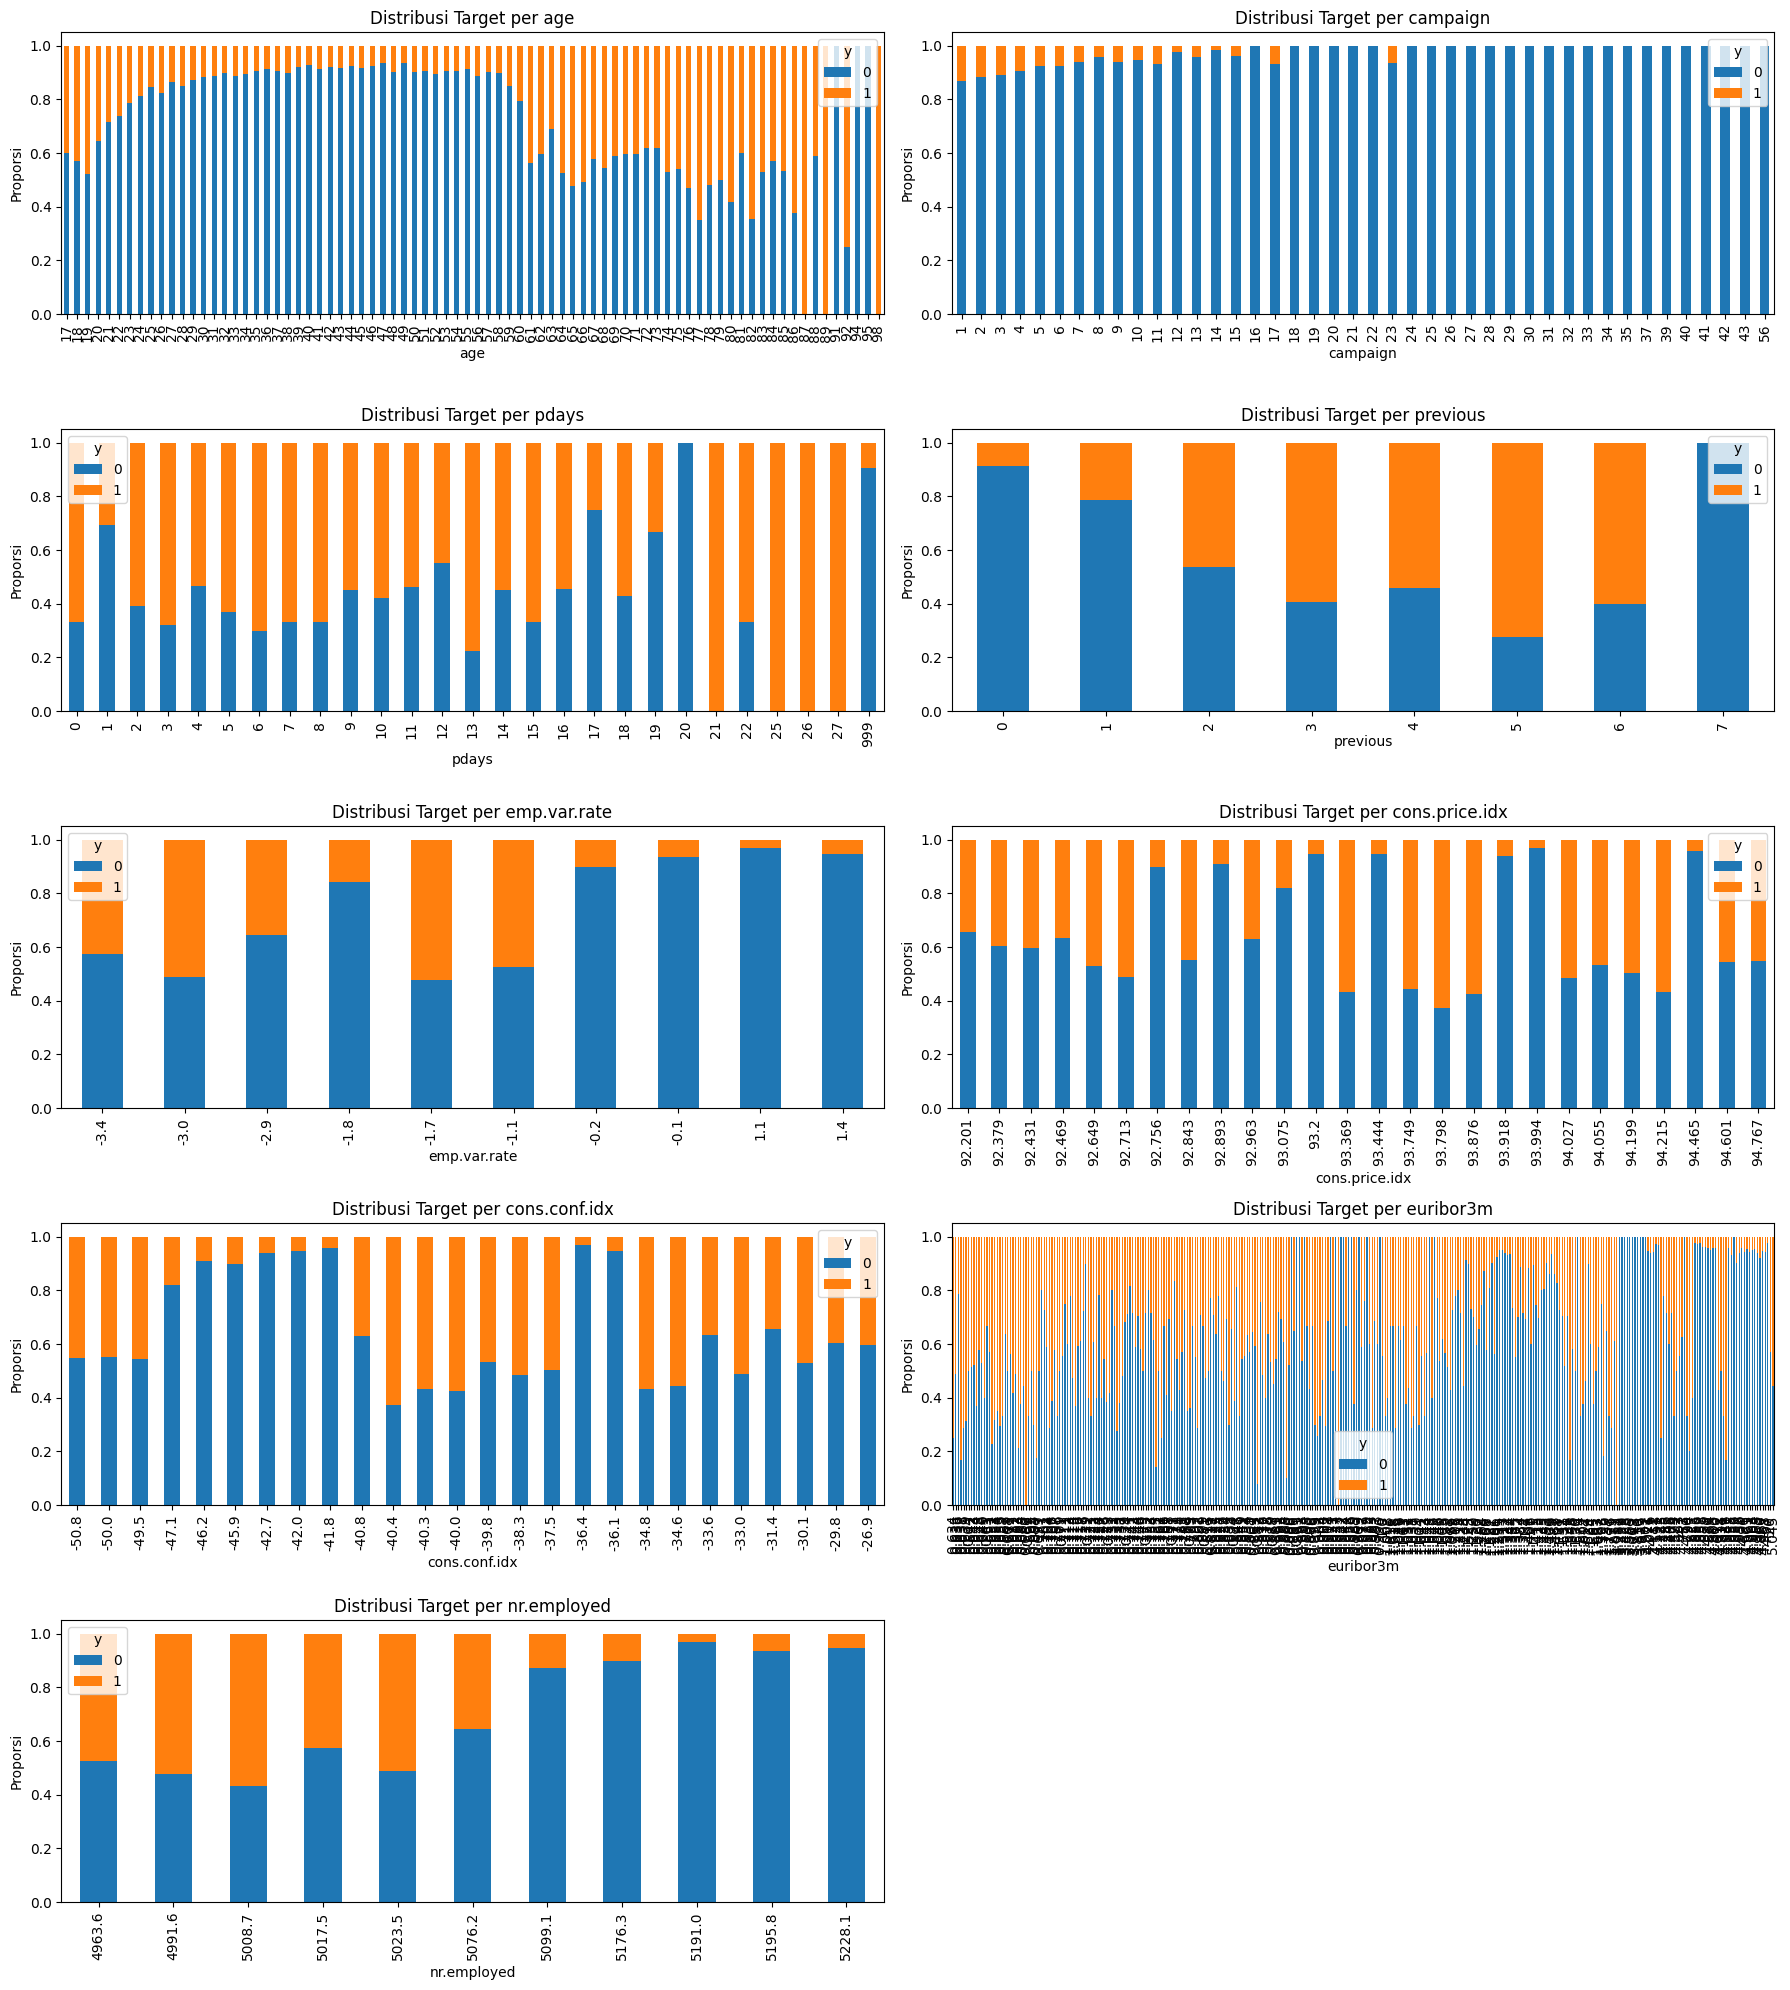

In [155]:
import math

# Ambil kolom yang ingin diplot (selain kategorikal utama dan target)
features_to_plot = df.drop(columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'poutcome', 'y']).columns

# Hitung layout subplot
n = len(features_to_plot)
cols = 2
rows = math.ceil(n / cols)

fig = plt.figure(figsize=(18, 4 * rows))
count = 0

for col in features_to_plot:
    count += 1
    ax = plt.subplot(rows, cols, count)
    pd.crosstab(df[col], df['y'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Distribusi Target per {col}')
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.tight_layout()

plt.show()


In [28]:
for i in df.drop(columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'poutcome', 'y']).columns:
    y_dist = df.groupby(i)['y'].value_counts(normalize=True).unstack()
    display(y_dist.sort_values(by=1, ascending=False))

y,0,1
age,,
98,NaN,1.000000
89,NaN,1.000000
87,NaN,1.000000
92,0.250000,0.750000
77,0.350000,0.650000
...,...,...
49,0.934446,0.065554
47,0.937433,0.062567
91,1.000000,NaN


y,0,1
campaign,,
1,0.869627,0.130373
2,0.885409,0.114591
3,0.892509,0.107491
4,0.906038,0.093962
6,0.923391,0.076609
5,0.924953,0.075047
17,0.931034,0.068966
11,0.932203,0.067797
23,0.937500,0.062500


y,0,1
pdays,,
27,NaN,1.000000
26,NaN,1.000000
25,NaN,1.000000
21,NaN,1.000000
13,0.222222,0.777778
6,0.298544,0.701456
3,0.321185,0.678815
15,0.333333,0.666667
22,0.333333,0.666667


y,0,1
previous,,
5,0.277778,0.722222
6,0.400000,0.600000
3,0.407407,0.592593
4,0.457143,0.542857
2,0.535809,0.464191
1,0.787985,0.212015
0,0.911676,0.088324
7,1.000000,NaN


y,0,1
emp.var.rate,,
-1.7,0.478655,0.521345
-3.0,0.488372,0.511628
-1.1,0.525984,0.474016
-3.4,0.575701,0.424299
-2.9,0.643201,0.356799
-1.8,0.840884,0.159116
-0.2,0.900000,0.100000
-0.1,0.936991,0.063009
1.4,0.946635,0.053365


y,0,1
cons.price.idx,,
93.798,0.373134,0.626866
93.876,0.424528,0.575472
93.369,0.431818,0.568182
94.215,0.434084,0.565916
93.749,0.442529,0.557471
94.027,0.484979,0.515021
92.713,0.488372,0.511628
94.199,0.504950,0.495050
92.649,0.529412,0.470588


y,0,1
cons.conf.idx,,
-40.4,0.373134,0.626866
-40.0,0.424528,0.575472
-34.8,0.431818,0.568182
-40.3,0.434084,0.565916
-34.6,0.442529,0.557471
-38.3,0.484979,0.515021
-33.0,0.488372,0.511628
-37.5,0.504950,0.495050
-30.1,0.529412,0.470588


y,0,1
euribor3m,,
3.053,NaN,1.000000
0.688,NaN,1.000000
0.933,NaN,1.000000
0.870,0.076923,0.923077
0.885,0.100000,0.900000
...,...,...
3.853,1.000000,NaN
3.879,1.000000,NaN
3.901,1.000000,NaN


y,0,1
nr.employed,,
5008.7,0.432308,0.567692
4991.6,0.478655,0.521345
5023.5,0.488372,0.511628
4963.6,0.525984,0.474016
5017.5,0.575701,0.424299
5076.2,0.643201,0.356799
5099.1,0.872011,0.127989
5176.3,0.900000,0.100000
5195.8,0.936991,0.063009


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :

1. **Pekerjaan (`job`)**

   Calon nasabah dengan pekerjaan seperti `"student"` dan `"retired"` menunjukkan **proporsi ketertarikan** (`y = "yes"`) **yang lebih tinggi** dibandingkan kategori pekerjaan lainnya, seperti `blue-collar` atau `admin`.

2. **Status Pernikahan (`marital`)**

   Calon nasabah dengan status `single` cenderung **lebih tertarik** dibandingkan yang `"married"` atau `"divorced"`, meskipun perbedaannya tidak terlalu signifikan.

3. **Tingkat Pendidikan (`education`)**

   Nasabah dengan pendidikan **tertiary** (**'university.degree'**) menunjukkan **tingkat ketertarikan yang lebih tinggi** dibandingkan dengan yang memiliki pendidikan dasar (`basic.9y`, `basic.6y`) atau menengah.

4. **Pinjaman (`loan`) dan Perumahan (`housing`)**

   Nasabah **yang tidak memiliki pinjaman pribadi** (`loan = "no"`) atau **tidak sedang dalam kredit rumah** (`housing = "no"`) memiliki **tingkat ketertarikan lebih tinggi** dibandingkan yang sedang memiliki pinjaman/kredit.

5. **Default Kredit (`default`)**

   Nasabah yang **tidak pernah gagal bayar sebelumnya** (`default = "no"`) lebih tertarik terhadap produk yang ditawarkan dibandingkan yang memiliki riwayat gagal bayar.

6. **Jenis Kontak (`contact`)**

   Kontak melalui `"cellular"` memiliki **konversi (ketertarikan) yang jauh lebih tinggi** dibandingkan kontak melalui `"telephone"`, menunjukkan efektivitas medium komunikasi.

7. **Hasil Kontak Sebelumnya (`poutcome`)**

   Nasabah yang sebelumnya **berhasil (success)** dalam kampanye pemasaran menunjukkan proporsi `"yes"` **yang sangat tinggi**, sedangkan `nonexistent` dan `failure` cenderung tidak tertarik.

Sekarang mari kita lihat juga untuk kolom `job`, apakah terlihat perbedaan kecenderungan minat antara kandidat dari `job` yang berbeda.

In [29]:
relevent_experience_df = df.groupby('job')['y'].value_counts(normalize=True).unstack()
relevent_experience_df['count'] = df.groupby('job')['y'].count()
display(relevent_experience_df.sort_values(by=[1], ascending=False).head(15))
display(relevent_experience_df.sort_values(by=[1], ascending=False).tail(15))

y,0,1,count
job,,,
student,0.685714,0.314286,875
retired,0.747381,0.252619,1718
unemployed,0.857988,0.142012,1014
admin.,0.870872,0.129128,10749
management,0.887825,0.112175,2924
technician,0.891675,0.108325,6739
self-employed,0.895144,0.104856,1421
housemaid,0.900000,0.100000,1060
entrepreneur,0.914835,0.085165,1456


y,0,1,count
job,,,
student,0.685714,0.314286,875
retired,0.747381,0.252619,1718
unemployed,0.857988,0.142012,1014
admin.,0.870872,0.129128,10749
management,0.887825,0.112175,2924
technician,0.891675,0.108325,6739
self-employed,0.895144,0.104856,1421
housemaid,0.900000,0.100000,1060
entrepreneur,0.914835,0.085165,1456


Terlihat dari table diatas, bahwa ada perbedaan kecenderungan minat antara kandidat dari `job` yang berbeda.

Mari kita lihat kecenderungan 4 `job` dengan jumlah kandidat terbanyak.

In [23]:
df['job'].value_counts()

job
admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [11]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['admin.']

y
0            0.870872
1            0.129128
count    10749.000000
Name: admin., dtype: float64

In [12]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['blue-collar']

y
0           0.931049
1           0.068951
count    9253.000000
Name: blue-collar, dtype: float64

In [13]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['technician']

y
0           0.891675
1           0.108325
count    6739.000000
Name: technician, dtype: float64

In [14]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['services']

y
0           0.918578
1           0.081422
count    3967.000000
Name: services, dtype: float64

Terlihat bahwa `"admin."`,`"blue-collar"`, `"technician"`, dan `"services"` memiliki kecenderungan kandidat yang mirip, dimana jauh lebih banyak yang tidak berminat dibandingkan yang berminat.

### **Data Preparation**

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Daftar fitur kategorikal
categorical_features = ['job', 'marital', 'education', 'default', 
                        'housing', 'loan', 'contact', 'poutcome']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'poutcome']

# Column Transformer
transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


In [38]:
# df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [9]:
x = df.drop(columns=['y'])
y = df['y']
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [11]:
x_train,x_test,y_train,y_test

(       age          job  marital            education  default  housing  loan  \
 39139   30   technician  married  professional.course        0        1     0   
 16073   37       admin.  married    university.degree        0        1     0   
 19698   30       admin.   single    university.degree        0        0     0   
 2716    42  blue-collar  married             basic.4y        0        1     0   
 14551   33    housemaid  married             basic.9y        0        0     0   
 ...    ...          ...      ...                  ...      ...      ...   ...   
 29817   35       admin.   single    university.degree        0        1     1   
 25109   48   technician   single  professional.course        0        1     1   
 27010   46       admin.   single          high.school        0        1     1   
 10699   33       admin.  married    university.degree        0        0     1   
 12291   31   technician  married          high.school        0        1     0   
 
        contac

In [12]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__marital_single,onehot__education_basic.6y,onehot__education_basic.9y,onehot__education_high.school,onehot__education_illiterate,onehot__education_professional.course,onehot__education_university.degree,onehot__default_1,onehot__housing_1,onehot__loan_1,onehot__contact_1,onehot__poutcome_nonexistent,onehot__poutcome_success,remainder__age,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,30.0,2.0,6.0,2.0,-1.8,93.369,-34.8,0.655,5008.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,37.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0,4.0,999.0,0.0,1.4,93.444,-36.1,4.968,5228.1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,33.0,4.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1


In [13]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [16]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [bin

,mean recall,sdev
model,,
LightGBM,0.796440,0.011486
XGBoost,0.784815,0.008589
Random Forest,0.771709,0.009293
Logistic Regression,0.759079,0.010346
KNN,0.729407,0.009746
Decision Tree,0.619148,0.009532


Terlihat bahwa model **LightGBM** adalah yang terbaik untuk **recall**-nya dari setiap model yang menggunakan default hyperparameter

#### **Model Benchmarking : Test Data**

In [17]:
# roc
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'recall score':score_roc_auc}).set_index('model').sort_values(by='recall score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.73      0.20      0.32       928

    accuracy                           0.90      8236
   macro avg       0.82      0.60      0.63      8236
weighted avg       0.89      0.90      0.88      8236

KNN 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.53      0.28      0.37       928

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.88      8236

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.31      0.35      0.33       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.62      8236
weighted avg       0.85      0

,recall score
model,
LightGBM,0.801918
XGBoost,0.781115
Random Forest,0.762399
Logistic Regression,0.743863
KNN,0.719730
Decision Tree,0.626504


In [18]:
from sklearn.metrics import classification_report, recall_score

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
score_recall = []

def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test)

for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model)
    
    # Hitung recall (positif class = 1)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)

    print(f"\n📌 {name}")
    print(classification_report(y_test, y_pred))

# Buat tabel ringkasan
result_df = pd.DataFrame({
    'model': model_names,
    'recall': score_recall
}).set_index('model').sort_values(by='recall', ascending=False)

result_df



📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.73      0.20      0.32       928

    accuracy                           0.90      8236
   macro avg       0.82      0.60      0.63      8236
weighted avg       0.89      0.90      0.88      8236


📌 KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.53      0.28      0.37       928

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.88      8236


📌 Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.31      0.34      0.32       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.62      8236
weighted avg       0.85    

,recall
model,
Decision Tree,0.341595
Random Forest,0.308190
KNN,0.280172
XGBoost,0.275862
LightGBM,0.268319
Logistic Regression,0.201509


Terlihat kembali lagi model **LightGBM** adalah yang terbaik performanya pada test data.

Mari sekarang kita coba melakukan oversampling untuk model **LightGBM** kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.

Reference : https://lightgbm.readthedocs.io/en/latest/index.html

#### **Test Oversampling with K-Fold Cross Validation**

In [19]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [20]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [21]:
data = x_train
target = y_train

In [22]:
print("start")
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    # lgbm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=2)
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

print("end")

start
[LightGBM] [Info] Number of positive: 3339, number of negative: 26307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 26307, number of negative: 26307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 52614, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


#### **Evaluation Metrics Without Oversampling**

In [23]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.913681,0.899818,0.876729,0.817987,0.705872,0.662604,0.324648,0.271505,0.780980,0.631250
1,0.913783,0.896782,0.874322,0.782715,0.708412,0.638697,0.330838,0.229111,0.774895,0.611511
2,0.912400,0.903157,0.874326,0.804191,0.701273,0.666397,0.318263,0.269542,0.768619,0.675676
3,0.913007,0.903461,0.877231,0.795616,0.705619,0.663285,0.326946,0.261456,0.767393,0.687943
4,0.913074,0.897693,0.875088,0.795172,0.705735,0.651256,0.326946,0.253369,0.768473,0.610390
5,0.913175,0.901032,0.874684,0.804004,0.704091,0.656044,0.322156,0.253369,0.776335,0.657343
6,0.914052,0.900121,0.873428,0.825581,0.708207,0.651013,0.329042,0.245283,0.781650,0.650000
7,0.913378,0.900729,0.875638,0.788920,0.708494,0.671848,0.332934,0.291105,0.765840,0.627907
8,0.913985,0.896478,0.874361,0.788708,0.709542,0.648340,0.332934,0.250674,0.775453,0.596154
9,0.913175,0.901336,0.876535,0.801522,0.704319,0.667145,0.322754,0.277628,0.775540,0.643750


#### **Evaluation Metrics With Oversampling**

In [24]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.791348,0.845173,0.888767,0.816259,0.789674,0.698375,0.702133,0.653226,0.854625,0.389423
1,0.796187,0.834548,0.889250,0.782447,0.795072,0.680568,0.722421,0.622642,0.847447,0.363208
2,0.788888,0.849120,0.884434,0.802121,0.787412,0.700856,0.705542,0.644205,0.846677,0.395695
3,0.791017,0.838798,0.888705,0.791591,0.789422,0.682540,0.703984,0.609164,0.852350,0.369281
4,0.788774,0.844869,0.884320,0.804489,0.787142,0.693983,0.701209,0.633423,0.850085,0.385246
5,0.787064,0.848209,0.886950,0.799646,0.785291,0.697252,0.696191,0.630728,0.850825,0.391960
6,0.789972,0.840619,0.888666,0.822064,0.788540,0.693784,0.707671,0.657682,0.847106,0.380062
7,0.791930,0.835458,0.889863,0.779409,0.790404,0.679450,0.706607,0.611860,0.851996,0.363200
8,0.790010,0.839709,0.888159,0.780914,0.788444,0.689266,0.703984,0.638814,0.850275,0.375594
9,0.785581,0.841530,0.887684,0.797198,0.783824,0.692293,0.695431,0.644205,0.848398,0.379968


Terlihat bahwa hasil evaluation metrics-nya, khususnya **recall untuk class positif** (`y = "yes"`), meningkat setelah dilakukan oversampling dibandingkan dengan model tanpa oversampling. Namun, **precision untuk class positif mengalami penurunan**, yaitu semakin banyak prediksi `"yes"` yang salah (**false positive**).

Hal ini wajar, karena **data positif yang sebelumnya minoritas kini diseimbangkan jumlahnya dengan class negatif**. Proses oversampling memang umum menghasilkan **kenaikan recall**, karena model lebih "berani" menebak `"yes"`, namun sebagai dampaknya **precision cenderung menurun**.

Pada kasus kali ini, **kenaikan recall lebih besar daripada penurunan precision**. Ini berarti, setelah dilakukan oversampling, model mampu **menemukan lebih banyak kandidat potensial**, meskipun **tebakan yang salah untuk kandidat potensial juga sedikit meningkat**. Konsekuensinya adalah **potensi biaya promosi atau waktu follow-up yang terbuang** menjadi lebih besar dibandingkan model tanpa oversampling.

Mari sekarang kita lihat juga classification reportsnya.

#### **Classification Reports Without Oversampling**

In [25]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2922
           1       0.63      0.27      0.38       372

    accuracy                           0.90      3294
   macro avg       0.77      0.63      0.66      3294
weighted avg       0.88      0.90      0.88      3294

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2923
           1       0.61      0.23      0.33       371

    accuracy                           0.90      3294
   macro avg       0.76      0.61      0.64      3294
weighted avg       0.88      0.90      0.88      3294

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2923
           1       0.68      0.27      0.39       371

    accuracy                           0.90      3294
   macro avg       0.79      0.63      0.67      3294
weighted avg       0.89      0.90      0.88      3294

              preci

#### **Classification Reports With Oversampling**

In [26]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2922
           1       0.39      0.65      0.49       372

    accuracy                           0.85      3294
   macro avg       0.67      0.76      0.70      3294
weighted avg       0.89      0.85      0.86      3294

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2923
           1       0.36      0.62      0.46       371

    accuracy                           0.83      3294
   macro avg       0.66      0.74      0.68      3294
weighted avg       0.88      0.83      0.85      3294

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2923
           1       0.40      0.64      0.49       371

    accuracy                           0.85      3294
   macro avg       0.67      0.76      0.70      3294
weighted avg       0.89      0.85      0.86      3294

              preci

Terlihat bahwa setelah dilakukan **oversampling**, model menghasilkan **recall yang lebih seimbang antara class 0 dan class 1**. Meskipun precision untuk class 1 tetap rendah (sekitar 0.36–0.40), **recall-nya meningkat secara konsisten ke kisaran 0.61–0.66**, yang menunjukkan bahwa model **lebih mampu mengenali lebih banyak nasabah potensial (class 1)** dibandingkan sebelum oversampling.

Dengan mengacu pada asumsi bahwa **nasabah potensial saat ini masih pas-pasan atau bahkan kurang**, maka **recall menjadi lebih penting daripada precision** dalam konteks ini. Oleh karena itu, **model dengan oversampling lebih sesuai untuk digunakan**, karena mampu menangkap lebih banyak calon nasabah tertarik, meskipun dengan konsekuensi sedikit menurunnya ketepatan (precision).

Sekarang mari kita coba melakukan hyperparameter tuning pada model LightGBM kita untuk mendapatkan hasil yang lebih baik lagi.

#### **Hyperparameter Tuning**
References :

1. https://lightgbm.readthedocs.io/en/latest/Parameters.html
2. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
3. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
4. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
import numpy as np


lgbm = LGBMClassifier()
ros = RandomOverSampler(random_state=42)

# Gunakan imblearn.Pipeline
estimator = Pipeline([
    ('oversampling', ros),
    ('preprocess', transformer),
    ('model', lgbm)
])

hyperparam_space = [{
    'model__max_bin': [230, 255, 275],
    'model__num_leaves': [21, 31, 41],
    'model__min_data_in_leaf': [20, 30, 40],
    'model__num_iterations': [75, 100, 125],
    'model__learning_rate': [0.05, 0.1, 0.125],
    'model__random_state': [42]
}]

# grid = GridSearchCV(
#     estimator=estimator,
#     param_grid=hyperparam_space,
#     scoring='recall',  # atau 'roc_auc', sesuai target evaluasi
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     verbose=1,
#     n_jobs=-1
# )

grid = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparam_space,
    n_iter=20,  # Coba 20 kombinasi acak
    scoring='recall',  # bisa diganti 'roc_auc' sesuai kebutuhan
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1,
    random_state=42
)


# from datetime import datetime
import time

print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()

print("start")
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print("end")

# Hasil terbaik
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

In [80]:
from imblearn.pipeline import Pipeline  # pastikan pakai ini
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime
import time

# Misalnya kamu pakai XGBoost
from xgboost import XGBClassifier

# Inisialisasi model
xgb = XGBClassifier(eval_metric='logloss')
print("satu")
# Pipeline dengan oversampling
estimator = Pipeline([
    ('preprocess', transformer),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', xgb)
])
print("dua")
# Hyperparameter grid
hyperparam_space = [{
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.1, 0.05],
    'model__n_estimators': [100, 150],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.8],
    'model__random_state': [42]
}]
print("tiga")
# Grid search dengan scoring recall
grid = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    scoring='recall',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
print("empat")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

# Hasil terbaik
print("Best Recall Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

satu
dua
tiga
empat
Tanggal dan waktu sekarang: 2025-07-28 01:33:00
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Recall Score: 0.9991913746630727
Best Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__random_state': 42, 'model__subsample': 0.8}
end
Waktu eksekusi: 71.67 detik
Tanggal dan waktu sekarang: 2025-07-28 01:34:12


In [81]:
from imblearn.pipeline import Pipeline  # pastikan pakai ini
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime
import time

# Misalnya kamu pakai XGBoost
from xgboost import XGBClassifier

# Inisialisasi model
xgb = XGBClassifier(eval_metric='logloss')
print("satu")
# Pipeline dengan oversampling
estimator = Pipeline([
    ('preprocess', transformer),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', xgb)
])
print("dua")
# Hyperparameter grid
# hyperparam_space = [{
#     'model__max_depth': [3, 5],
#     'model__learning_rate': [0.1, 0.05],
#     'model__n_estimators': [100, 150],
#     'model__min_child_weight': [1, 3],
#     'model__subsample': [0.8],
#     'model__colsample_bytree': [0.8],
#     'model__random_state': [42]
# }]
hyperparam_space = [{
    'model__max_depth': [3, 5, 7, 9],               # mirip dengan kontrol jumlah leaves
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__n_estimators': [100, 75, 125, 150],      # num_iterations ≈ n_estimators
    'model__min_child_weight': [1, 3, 5, 7],         # mirip dengan min_data_in_leaf
    'model__subsample': [0.8, 0.9, 1.0],             # tambahan: untuk regularisasi
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # tambahan: untuk regularisasi
    'model__random_state': [42]
}]
print("tiga")
# Grid search dengan scoring recall
grid = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    scoring='recall',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
print("empat")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

# Hasil terbaik
print("Best Recall Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

satu
dua
tiga
empat
Tanggal dan waktu sekarang: 2025-07-28 01:35:09
Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
Best Recall Score: 0.9991913746630727
Best Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__random_state': 42, 'model__subsample': 0.8}
end
Waktu eksekusi: 9772.94 detik
Tanggal dan waktu sekarang: 2025-07-28 04:18:02


default hyperparameter LGBM => max_bin = 255, num_leaves = 31, min_data_in_leaf = 20, num_iterations = 100, learning_rate = 0.1

Untuk hyperparameter max_bin dan learning_rate default valuenya tetap yang terbaik, utk num_leaves bisa dicoba diperkecil lagi dan dibandingkan dengan 21 (value terbaiknya skrg), utk min_data_in_leaf bisa dicoba disekitar angka 30 dan dibandingkan dengan 30 (value terbaiknya skrg), utk num_iterations bisa dicoba disekitar angka 75 dan dibandingkan dengan 75 (value terbaiknya skrg).

Tetapi untuk kali ini hyperparameter tuning yang akan kita lakukan hanya sampai sini saja, teman-teman nanti bisa mencoba tuning lebih lagi sendiri mengikuti petunjuk yang ada diatas ini. Dan juga sebenarnya kalau random_state dari modelnya, oversampling, dan KFoldnya berbeda akan menghasilkan hyperparameter terbaik yg berbeda juga, karena hasil dipengaruhi oleh datanya juga.

In [32]:
best_model = grid.best_estimator_
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
start = time.time()
best_model.fit(x_train, y_train)
end = time.time()
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


Tanggal dan waktu sekarang: 2025-07-31 20:54:15
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
end
Waktu eksekusi: 0.90 detik
Tanggal dan waktu sekarang: 2025-07-31 20:54:16


In [33]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('model', LGBMClassifier())])

In [34]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
ROC AUC Score Default LGBM :  0.8016908872893191
ROC AUC Score Tuned LGBM :  0.8082330063416567


In [ ]:
Terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki nilai Recall yang lebih baik walaupun hanya naik sedikit saja.

Mari kita lihat juga perbandingan classification reportnya

In [35]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBOOST : \n', report_default)
print('Classification Report Tuned XGBOOST : \n', report_tuned)

Classification Report Default XGBOOST : 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7308
           1       0.37      0.62      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.74      0.69      8236
weighted avg       0.88      0.84      0.86      8236

Classification Report Tuned XGBOOST : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.63      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.84      0.86      8236



Kembali lagi terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model LGBM yang sudah di tuned sebagai model akhir kita.

#### **Feature Importances**

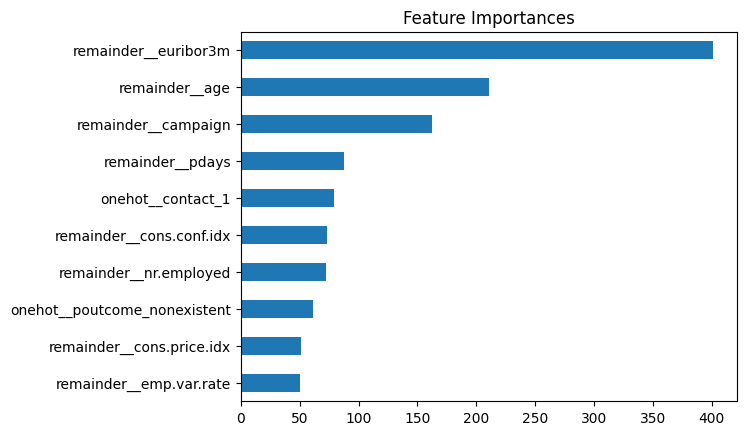

In [36]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa pada model LGBM yang digunakan, fitur `euribor3m` (**tingkat suku bunga Eropa**) merupakan faktor yang paling berpengaruh dalam memprediksi apakah nasabah akan membuka deposito, diikuti oleh `age` (**usia nasabah**), dan `campaign` (**jumlah kontak dalam kampanye saat ini**).

Fitur-fitur lainnya seperti `pdays`, `contact`, dan indikator ekonomi lainnya (`cons.conf.idx`, `nr.employed`, dll.) juga berkontribusi terhadap prediksi, meskipun dengan pengaruh yang lebih kecil.

Jika model ini nantinya digunakan untuk **memprediksi ketertarikan nasabah sebelum dilakukan kontak telepon**, maka beberapa fitur yang hanya tersedia **setelah interaksi** (misalnya `pdays` atau hasil `poutcome`) mungkin perlu dipertimbangkan untuk dihapus atau diganti, agar **tidak terjadi data leakage**.

Namun, untuk studi kali ini kita menggunakan asumsi bahwa model diterapkan **setelah informasi kampanye tersedia secara lengkap** (misalnya setelah satu atau dua kali kontak), dengan tujuan untuk **menyaring dan memprioritaskan calon** nasabah yang layak untuk ditindaklanjuti lebih lanjut. Dengan demikian, model ini dapat membantu **mengurangi biaya telemarketing**, dan membuat kampanye pemasaran menjadi **lebih efisien dan terarah**.

### **Conclusion & Recommendation**

In [37]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.63      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.84      0.86      8236



Berdasarkan hasil classification report dari model Tuned LGBM, kita dapat menyimpulkan bahwa apabila model ini digunakan untuk menyaring atau memfilter daftar nasabah yang akan dihubungi dalam kampanye telemarketing, maka:

1. Model mampu **menghindari 86% nasabah yang tidak tertarik** (berdasarkan recall class 0 = 0.86), artinya kita bisa mengurangi signifikan jumlah nasabah yang tidak perlu di-approach.

2. Model juga berhasil **mengidentifikasi 63% dari seluruh nasabah yang benar-benar tertarik** untuk membuka deposito (recall class 1 = 0.63).

3. Ketika model memprediksi bahwa seseorang tertarik (`y = 1`), **kemungkinan prediksinya benar adalah 37%** (precision class 1 = 0.37). Artinya masih ada 63% dari prediksi tersebut yang kemungkinan salah (false positive).

4. Meskipun precision rendah, recall yang cukup baik menunjukkan bahwa model **cenderung "berani menebak positif"** untuk menangkap lebih banyak kandidat potensial.

#### **Simulasi Biaya Kampanye**
Misalkan:

1. Biaya follow-up per nasabah: €40 (berdasarkan sumber: appliqant.com)

2. Jumlah nasabah dalam satu periode: 200 orang

    * 100 tertarik membuka deposito (`y=1`)

    * 100 tidak tertarik (`y=0`)

#### **Tanpa Menggunakan Model (semua dihubungi):**
1. Total biaya kampanye: 200 x €40 = €8,000

2. Nasabah tertarik didapat: 100 orang

3. Biaya terbuang: 100 x $40 = €4,000 (karena ditolak)

4. Penghematan: €0 (semua diproses)

#### **Dengan Menggunakan Model Tuned LGBM:**
1. Recall class 1 = 0.63 → 63 orang dari 100 tertarik berhasil diidentifikasi

2. Recall class 0 = 0.86 → 86 orang dari 100 yang tidak tertarik berhasil dihindari

3. Berarti model tetap menghubungi 14 orang yang tidak tertarik (false positive)

#### **Perhitungan:**

1. Biaya efektif:

    * (63 tertarik x €40) = €2,520

    * (14 tidak tertarik x $40) = $560

    * Total biaya: €3,080

2. Biaya terbuang: €560

3. Penghematan: (86 orang yang tidak perlu dihubungi x €40) = €3,440

#### **Kesimpulan**
Dengan menggunakan model Tuned LGBM:

1. Perusahaan menghemat hingga $3,440 dalam satu kampanye

2. Jumlah nasabah potensial yang berhasil diidentifikasi tetap signifikan (63 orang)

3. Meskipun precision-nya rendah, strategi ini tetap efektif untuk mengurangi biaya operasional tanpa mengorbankan terlalu banyak peluang konversi

#### **Model Implementation**
Untuk implementasi model prediksi pada kampanye telemarketing ini, pendekatan yang dapat digunakan adalah sebagai berikut:

**Hanya nasabah yang diprediksi akan tertarik (`y=1`) oleh model yang akan dihubungi atau ditawarkan produk deposito.**

Selain itu, urutan prioritas dalam melakukan kontak dapat disusun berdasarkan nilai **probabilitas prediksi positif** yang dihasilkan oleh model (menggunakan `predict_proba`). Artinya, **semakin tinggi probabilitas seorang nasabah untuk menerima penawaran**, maka nasabah tersebut sebaiknya dihubungi **lebih awal**.

Namun, perlu dilakukan validasi tambahan terlebih dahulu untuk memastikan bahwa:

1. **Semakin tinggi nilai probabilitas `y=1`**, memang benar **semakin sering nasabah tersebut benar-benar menerima penawaran dalam data historis**.

2. Hal ini penting untuk menjamin bahwa strategi berbasis probabilitas benar-benar konsisten dan **berdampak positif terhadap efisiensi kampanye**.

Dengan pendekatan ini, perusahaan dapat:

1. Mengurangi biaya promosi

2. Memprioritaskan nasabah yang paling potensial

3. Dan meningkatkan ROI dari kegiatan telemarketing

#### **Recommendation**
Hal-hal yang dapat dilakukan untuk mengembangkan proyek dan meningkatkan kinerja model ke depannya:

1. Melengkapi Data Nasabah Secara Konsisten
    Dorong agar setiap data nasabah tercatat dengan lengkap dan akurat. Misalnya, jika data seperti `job`, `education`, atau `contact` tidak tersedia ('"unknown"`), sebaiknya tetap diisi secara eksplisit sebagai "tidak diketahui" daripada dibiarkan kosong, agar model dapat memperlakukan kategori ini secara konsisten.

2. Menambahkan Fitur-Fitur Baru yang Relevan
    Pertimbangkan untuk menambahkan fitur baru yang dapat memengaruhi ketertarikan nasabah terhadap produk deposito, seperti:

    * Lokasi atau kota nasabah (bisa dikaitkan dengan cabang terdekat)

    * Status atau skor kredit

    * Pendapatan bulanan atau kisaran penghasilan

    * Riwayat interaksi digital nasabah (jika tersedia, misalnya email, mobile banking)

    * Kategori produk lain yang sudah dimiliki nasabah

3. Eksplorasi Model dan Teknik Lain
    Selain LGBM, coba eksplor algoritma lain seperti:

    * XGBoost, CatBoost

    * Logistic Regression (untuk baseline interpretable)

    * Neural Network sederhana
    Juga pertimbangkan teknik resampling lainnya seperti **SMOTE** atau **SMOTENC** (jika ada fitur kategorikal), untuk menangani imbalance class lebih optimal.

4. Melakukan Analisis Kesalahan Model (Error Analysis)
    Lakukan analisis pada data yang masih salah diklasifikasikan oleh model, baik false positive maupun false negative, untuk:

    * Mengidentifikasi pola kegagalan model

    * Menemukan peluang perbaikan fitur

    * Memahami lebih dalam perilaku nasabah yang “menipu” model

5. Validasi Probabilitas & Threshold Klasifikasi
    Uji apakah **probabilitas output model benar-benar berkorelasi dengan kemungkinan tertarik**, agar strategi pengurutan kontak berdasarkan `predict_proba` bisa diterapkan secara optimal.
    Juga eksplorasi **threshold klasifikasi** (tidak hanya default 0.5), untuk mendapatkan trade-off terbaik antara recall dan precision sesuai konteks bisnis.

#### **Tantangan dan Batasan Model**
1. Dataset Imbalanced
    * Jumlah data `y = "no"` (nasabah tidak tertarik) jauh lebih besar daripada `y = "yes"`.

    * Ini menyulitkan model untuk belajar pola yang benar pada class minoritas.

    * Oversampling (seperti RandomOverSampler) bisa membantu, tapi dapat menurunkan precision dan menambah false positive.

2. Fitur duration Tidak Bisa Digunakan untuk Prediksi
    * `duration` adalah fitur paling kuat, tapi baru tersedia setelah telepon berlangsung.

    * Menggunakannya dalam prediksi awal akan menyebabkan `data leakage`.

    * Maka, model harus mengandalkan fitur lain yang lebih lemah korelasinya.

3. Nilai `"unknown"` pada Banyak Fitur Kategorikal
    * Beberapa kolom seperti `job`, `education`, dan `contact` memiliki banyak nilai `"unknown"`.

    * Ini bisa mengaburkan pola dan menurunkan kualitas prediksi.

    * Imputasi atau perlakuan khusus perlu dirancang.

4. Fitur Terbatas dan Tidak Personal
    * Tidak ada data tentang:

        * Penghasilan nasabah

        * Lokasi geografis

        * Produk bank lain yang dimiliki nasabah

    * Tanpa fitur yang lebih personal, model sulit melakukan prediksi yang sangat tajam.

5. Tidak Ada Informasi Tentang Agen Telemarketing
    * Kita tidak tahu siapa agen yang melakukan kontak, kapan waktunya, atau pendekatan komunikasi yang digunakan.

    * Faktor eksternal ini bisa sangat berpengaruh terhadap keberhasilan kampanye, tapi tidak tersedia dalam dataset.

6. Asumsi Biaya yang Disederhanakan
    * Estimasi biaya (`call_fee`) didasarkan pada tarif tetap dan durasi.

    * Tidak memperhitungkan biaya overhead, insentif agen, atau faktor lain dalam operasional riil.

7. Generalization dan Deployment
   * Model mungkin bekerja baik di data historis, tapi performanya bisa menurun di kampanye mendatang jika:

        * Nasabahnya berubah

        * Promosi bank berubah

        * Lingkungan ekonomi berubah

    * Diperlukan pemantauan dan re-training secara berkala.

8. Tidak Ada Penilaian ROI Secara Langsung
    * Meskipun kita bisa mengukur efisiensi biaya, dataset ini tidak menyertakan informasi:

        * Berapa besar deposito yang benar-benar dibuka

        * Nilai moneter dari konversi

    * Sehingga, kita belum bisa hitung ROI atau impact ke revenue secara langsung.

### **Goodluck & Thank You**